## ADVANCE REGRESSION ASSIGNMENT
### By Venkata Sreeleela Sappa

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties: Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## BUSINESS GOAL

Model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### 1: Import libraries and  Dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm #for add the constant value
from sklearn.preprocessing import MinMaxScaler #for performing minmax scaling on the continous variables of training data
from sklearn.model_selection import train_test_split #for spliting the data in terms of train and test

from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF
from sklearn.metrics import mean_squared_error #for calculating the mean squared error

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")

In [3]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [4]:
df.shape

(1460, 81)

### 2: Define Functions for use in the workbook at different stages

In [5]:
#Check for missing values & display all rows
def check_missing_vals(x):
    pd.set_option('display.max_rows', None)
    return pd.concat([x.isnull().mean()], axis=1, keys=['Cnt_of_Nulls'])

# Creating a function to check unique values and its percentanges in the remaining columns to understand the skewness within the columns

def v_cnts(cols):
    for i in cols:
        print("***************************************************************")
        print(i)
        print("----------------------------------------------------------------")
        print(df[i].value_counts(normalize=True, dropna=False)*100) 
        
        
# Create a count plot vertically for an input list 

def count_plot_vertical(cols_vertical,rows,cols) :
    # Define the number of rows and columns in the matrix
    num_rows = rows
    num_cols = cols
    # Create a figure and axes for the matrix of countplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    # Flatten the axes matrix to make it easier to iterate over
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        # Select the corresponding column from the data for each countplot
        column = df[cols_vertical[i]]
        sns.countplot(x=column, data=df, ax=ax)
        ax.set_title(cols_vertical[i])
    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()
    
# Function to remove lower threshold values & return new dataframe
def remove_upper_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    #Inter Quartile Range
    IQR = Q3 - Q1
    return df[~((df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

def numerical_summary(col_name) :
    # Numerical summary
    print('Numerical Summary: ')
    print('Min :',df[col_name].min())
    print('Max :',df[col_name].max())
    print('25% Data :',df[col_name].quantile(0.25))
    print('Mean:',df[col_name].mean())
    print('75% Data :',df[col_name].quantile(0.75))
    print('90% Data :', df[col_name].quantile(0.9))
    print('99% Data :', df[col_name].quantile(0.99))
    print('100% Data :', df[col_name].quantile(1))
    
def dist_plot_box_plot(col_name,title_dist,title_box,xlable,ylable) :
    # Distribution plot and outlier plot
    # Distribution plot
    plt.figure(figsize=(20,12))
    plt.subplot(2,2,1)
    viz = sns.distplot(df[col_name], color='black')
    viz.set_title(title_dist,fontsize=14,color='black')
    viz.set_ylabel(ylable,fontsize =10,color = 'black')
    viz.set_xlabel(xlable,fontsize =10,color = 'black') 
    # Outlier plot
    plt.subplot(2,2,2)
    viz = sns.boxplot(df[col_name], color='red',fliersize=2)
    viz.set_title(title_box,fontsize=14,color='black')
    viz.set_xlabel(xlable,fontsize =10,color = 'black')
    plt.show()
    
# box plots of all columns against hue as the column for prediction 'cnt'
def box_plot(cols_list) :    
    plt.figure(figsize=(20, 12))
    num=0;
    for i in cols_list :
        column=i
        num=num+1
        plt.subplot(3,2,num)
        sns.boxplot(x = column, y = 'SalePrice', data = df)
    plt.show()
# function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif_filtered = vif[vif['Features'] != 'const']
    return vif_filtered 

#residualAnalysis
def res_anal(y_pred_train,res) :
    # Normal distribution
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.set_style("darkgrid")
    viz = sns.distplot(res,bins = 10,color = 'black')
    viz.set_title('Error Terms', fontsize = 10,color = 'black')
    viz.set_ylabel('Density',fontsize =10,color = 'black')
    viz.set_xlabel('Errors', fontsize = 10,color = 'black') 
    # Error terms are independent
    plt.subplot(1,3,2)
    sns.set_style("darkgrid")
    viz=sns.scatterplot(x=y_pred_train,y=res)
    viz.set_title('Residual Vs. Predicted Values', fontsize = 10,color = 'black')
    viz.set_ylabel('Residuals',fontsize =10,color = 'black')
    viz.set_xlabel('Predicted Values', fontsize = 10,color = 'black') 
    # Homoscedasticity
    plt.subplot(1,3,3)
    sns.set_style("darkgrid")
    viz=sns.regplot(x=y_train, y=y_pred_train)
    viz.set_title('Predicted Points Vs. Actual Points', fontsize = 10,color = 'black')
    viz.set_ylabel('Predicted Points',fontsize =10,color = 'black')
    viz.set_xlabel('Actual Points', fontsize = 10,color = 'black')
    plt.show()
#metrics 
def calc_metrics(y_pred_train,y_pred_test,y_train,y_test):
    # Lets calculate some metrics such as R2 score, RSS and RMSE
    metric=[]
    r2_train = r2_score(y_train, y_pred_train)
    print("R2 Train",r2_train)
    metric.append(r2_train)
    r2_test = r2_score(y_test, y_pred_test)
    print("R2 Test",r2_test)
    metric.append(r2_test)
    rss_train = np.sum(np.square(y_train - y_pred_train))
    print("Residual sum of square Train",rss_train)
    metric.append(rss_train)
    rss_test= np.sum(np.square(y_test - y_pred_test))
    print("Residual sum of square Test",rss_test)
    metric.append(rss_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    print("Mean Sqr Error Train",mse_train)
    metric.append(mse_train**0.5)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print("Mean Sqr Error Test",mse_test)
    metric.append(mse_test**0.5)
    return metric

### 3: Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Check for missing values & display all rows
null_vals=check_missing_vals(df)
null_vals[null_vals.Cnt_of_Nulls>0] #checking variables which have null

Cnt_of_Nulls
LotFrontage       0.177397
Alley             0.937671
MasVnrType        0.005479
MasVnrArea        0.005479
BsmtQual          0.025342
BsmtCond          0.025342
BsmtExposure      0.026027
BsmtFinType1      0.025342
BsmtFinType2      0.026027
Electrical        0.000685
FireplaceQu       0.472603
GarageType        0.055479
GarageYrBlt       0.055479
GarageFinish      0.055479
GarageQual        0.055479
GarageCond        0.055479
PoolQC            0.995205
Fence             0.807534
MiscFeature       0.963014

#### Observations:
1) We can see that null values are present in LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
2) If we check the data dictionary closely, we can see that there are not null values, NA there is one of the categorical variable meaning 'no fence','no pool' etc., Need to take care of this in data cleaning.
3) Data is about the sales made between the years **2006 and 2010**.
4) **SalePrice** is the variable we are interested in predicting based on other variables in the data.Since its a continous variable we can proceed with regression. 
5) Data has almost 47 categorical variables. More than half of the columns.
6) The propery sales are at different neighbourhoods with in **Ames city limits**.


 ### 4: Data Cleaning:

#### 4.1: Remove unique value columns : 
PoolQC-0.995205 ,MiscFeature -0.963014, Alley -0.937671

We see that these 4 columsn have more than 80% as NA / No Pool,no Alley, no Fence. So these columns will not be useful in analysis. Hence dropping them. 

Id column is also a sequence numner. We can drop it as all rows are unique.

In [8]:
# Remove columns in-place with greater than (>) 80% missing values or unique values
df.drop(['PoolQC', 'MiscFeature', 'Alley','Id'], axis=1, inplace=True)

#### 4.2 : Imputing 'NA' missing values
We Observe that few columns have NA value because that feature is not present for the house, hence we can impute them with a value.
Example: GarageType having NA, here the NA means there is no garage, so we can impute with 'No garage'

In [9]:
#imputing values with "No ..""
df['BsmtQual'].fillna('No Basement',inplace = True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)
df['GarageType'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)
df['Fence'].fillna('No Fence',inplace=True)

#### 4.3 : Imputing other missing values

In [10]:
#Check for missing values & display all rows
null_vals=check_missing_vals(df)
null_vals[null_vals.Cnt_of_Nulls>0]

Cnt_of_Nulls
LotFrontage      0.177397
MasVnrType       0.005479
MasVnrArea       0.005479
Electrical       0.000685
GarageYrBlt      0.055479

In [11]:
df[['LotFrontage','GarageYrBlt','MasVnrType','MasVnrArea','Electrical']].head(10)

LotFrontage  GarageYrBlt MasVnrType  MasVnrArea Electrical
0         65.0       2003.0    BrkFace       196.0      SBrkr
1         80.0       1976.0       None         0.0      SBrkr
2         68.0       2001.0    BrkFace       162.0      SBrkr
3         60.0       1998.0       None         0.0      SBrkr
4         84.0       2000.0    BrkFace       350.0      SBrkr
5         85.0       1993.0       None         0.0      SBrkr
6         75.0       2004.0      Stone       186.0      SBrkr
7          NaN       1973.0      Stone       240.0      SBrkr
8         51.0       1931.0       None         0.0      FuseF
9         50.0       1939.0       None         0.0      SBrkr

1. LotFrontage- Linear feet of street connected to property- Numeric Value - Can be imputed with median,
2. GarageYrBlt- Year garage was built - numeric value- can be imputed with median,
3. MasVnrType- Masonry veneer type(BrkCmn,BrkFace,CBlock,None,Stone)- Categorical variable - Can be imputed with mode,
4. MasVnrArea- Masonry veneer area in square feet - Numeric Value - Can be imputed with median,
5. Electrical- Electrical system(SBrkr,FuseA,FuseF,FuseP,Mix) - Categorical variable - Can be imputed with mode

In [12]:
# impute missing values with mean or median for numeric data
df["LotFrontage"]=df["LotFrontage"].replace(np.nan, df["LotFrontage"].mean()) 
df["MasVnrArea"]=df["MasVnrArea"].replace(np.nan, df["MasVnrArea"].mean())
df["GarageYrBlt"]=df["GarageYrBlt"].replace(np.nan, df["GarageYrBlt"].mean())
df['Electrical'] =df['Electrical'].fillna(df['Electrical']).mode()[0]
df['MasVnrType'] =df['MasVnrType'].fillna(df['MasVnrType']).mode()[0]                                                 

In [13]:
#Check for missing values & display all rows
null_vals=check_missing_vals(df)
null_vals[null_vals.Cnt_of_Nulls>0]

Empty DataFrame
Columns: [Cnt_of_Nulls]
Index: []

#### 4.4: Check for duplicates if any

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape
#looks like there are no duplicates

(1460, 77)

#### 4.5: Derived variables

In [16]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
df['HouseAge'] = df.YrSold - df.YearBuilt
#Property age
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']


1. We will not be able to derive any conclusion based on YrSold, because this data is between 2006 and 2010, and in 2023 we cannot use any predictions based on the specific year. However we can use the age of the house. 
2. Hence dropping year built and year sold and using only house age. 
3. We will still keep the month, in case sale value is dependent on the month sold.May be the months where schools reopen etc., have better sales.

In [17]:
df=df.drop(columns=['YrSold', 'YearBuilt','GarageYrBlt','YearRemodAdd'])

### 5: Univariate Analysis

#### 5.1: Categorical variables
The categorical variables are : 
1. MSSubClass: Identifies the type of dwelling involved in the sale.(20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190)
2. MSZoning: Identifies the general zoning classification of the sale.(A,C,FV,I,RH,RL,RP,RM)
3. Street: Type of road access to property(Grvl,Pave)
4. LotShape: General shape of property(Reg,IR1,IR2,IR3)
5. LandContour: Flatness of the property(Lvl,Bnk,HLS,Low)
6. Utilities: Type of utilities available(AllPub,NoSewr,NoSeWa,ELO)
7. LotConfig: Lot configuration(Inside,Corner,CulDSac,FR2,FR3)
8. LandSlope: Slope of property(Gtl,Mod,Sev)
9. Neighborhood: Physical locations within Ames city limits(Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,Names,NoRidge,NPkVill,NridgHt,NWAmes,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker)
10. Condition1: Proximity to various conditions(Artery,Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe)
11. Condition2: Proximity to various conditions -if more than one is present(Artery,Feedr,Norm,RRNn,RRAn,PosN,PosA,RRNe,RRAe)
12. BldgType: Type of dwelling(1Fam,2FmCon,Duplx,TwnhsE,TwnhsI)
13. HouseStyle: Style of dwelling(1Story,1.5Fin,1.5Unf,2Story,2.5Fin,2.5Unf,SFoyer,SLvl)
14. OverallQual: Rates the overall material and finish of the house(10,9,8,7,6,5,4,3,2,1)
15. OverallCond: Rates the overall condition of the house(10,9,8,7,6,5,4,3,2,1)
16. RoofStyle: Type of roof(Flat,Gable,Gambrel,Hip,Mansard,Shed)
17. RoofMatl: Roof material(ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl)
18. Exterior1st: Exterior covering on house(AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone	,Stucco,VinylSd,Wd Sdng,WdShing)
19. Exterior2nd: Exterior covering on house (if more than one material)(AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Other,Plywood,PreCast,Stone	,Stucco,VinylSd,Wd Sdng,WdShing)
20. MasVnrType: Masonry veneer type(BrkCmn,BrkFace,CBlock,None,Stone)
21. ExterQual: Evaluates the quality of the material on the exterior(Ex,Gd,TA,Fa,Po)
22. ExterCond: Evaluates the present condition of the material on the exterior(Ex,Gd,TA,Fa,Po)
23. Foundation: Type of foundation(BrkTil,CBlock,PConc,Slab,Stone,Wood)
24. BsmtQual: Evaluates the height of the basement(Ex,Gd,TA,Fa,Po,No Basement)
25. BsmtCond: Evaluates the general condition of the basement(Ex,Gd,TA,Fa,Po,No Basement)
26. BsmtExposure: Refers to walkout or garden level walls(Gd,Av,Mn,No,No Basement)
27. BsmtFinType1: Rating of basement finished area(GLQ,ALQ,BLQ,Rec,LwQ,Unf,No Basement)
28. BsmtFinType2: Rating of basement finished area (if multiple types)(GLQ,ALQ,BLQ,Rec,LwQ,Unf,No Basement)
29. Heating: Type of heating(Floor,GasA,GasW,Grav,OthW,Wall)
30. HeatingQC: Heating quality and condition(Ex,Gd,TA,Fa,Po)
31. CentralAir: Central air conditioning(N,Y)
32. Electrical: Electrical system(SBrkr,FuseA,FuseF,FuseP,Mix)
33. KitchenQual: Kitchen quality(Ex,Gd,TA,Fa,Po)
34. Functional: Home functionality (Assume typical unless deductions are warranted)(Typ,Min1,Min2,Mod,Maj1,Maj2,Sev,Sal)
35. FireplaceQu: Fireplace quality(Ex,Gd,TA,Fa,Po,No Fireplace)
36. GarageType: Garage location(2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,No Garage)
37. GarageFinish: Interior finish of the garage(Fin,RFn,Unf,No Garage)
38. GarageQual: Garage quality(Ex,Gd,TA,Fa,Po,No Garage)
39. GarageCond: Garage condition(Ex,Gd,TA,Fa,Po,No Garage)
40. PavedDrive: Paved driveway(Y,P,N)
41. SaleType: Type of sale(WD,CWD,VWD,New,COD,Con,ConLw,ConLI,ConLD,Oth)
42. SaleCondition: Condition of sale(Normal,Abnorml,AdjLand,Alloca,Family,Partial)
43. Fence: Fence quality(GdPrv,MnPrv,GdWo,MnWw,No Fence)
44. GarageCars: Size of garage in car capacity(0,1,2,3,4)
45. Fireplaces: Number of fireplaces(0,1,2,3)
46. KitchenAbvGr: Kitchens above grade(0,1,2,3)
47. TotRmsAbvGrd:TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)(2,3,4,5,6,7,8,9,10,11,12,14)
48. BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms) (0,1,2,3,4,5,6,8)
50. BsmtFullBath: Basement full bathrooms(0,1,2,3)
51. BsmtHalfBath: Basement half bathrooms(0,1,2)
52. FullBath: Full bathrooms above grade(0,1,2,3)
53. HalfBath: Half baths above grade(0,1,2)
54. PoolArea: Pool area in square feet(0,480,512,519,555,576,648,738)
55. MoSold: Month Sold (MM)(1,2,3,4,5,6,7,8,9,10,11,12)


In [18]:
#list down all categorical variables
categorical_cols_init=['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Fence','GarageCars','Fireplaces','KitchenAbvGr','TotRmsAbvGrd','BedroomAbvGr','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','PoolArea','MoSold']

In [19]:
 v_cnts(categorical_cols_init)

***************************************************************
MSSubClass
----------------------------------------------------------------
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
***************************************************************
MSZoning
----------------------------------------------------------------
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
***************************************************************
Street
----------------------------------------------------------------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
***************************************************************
LotShape
------------------------

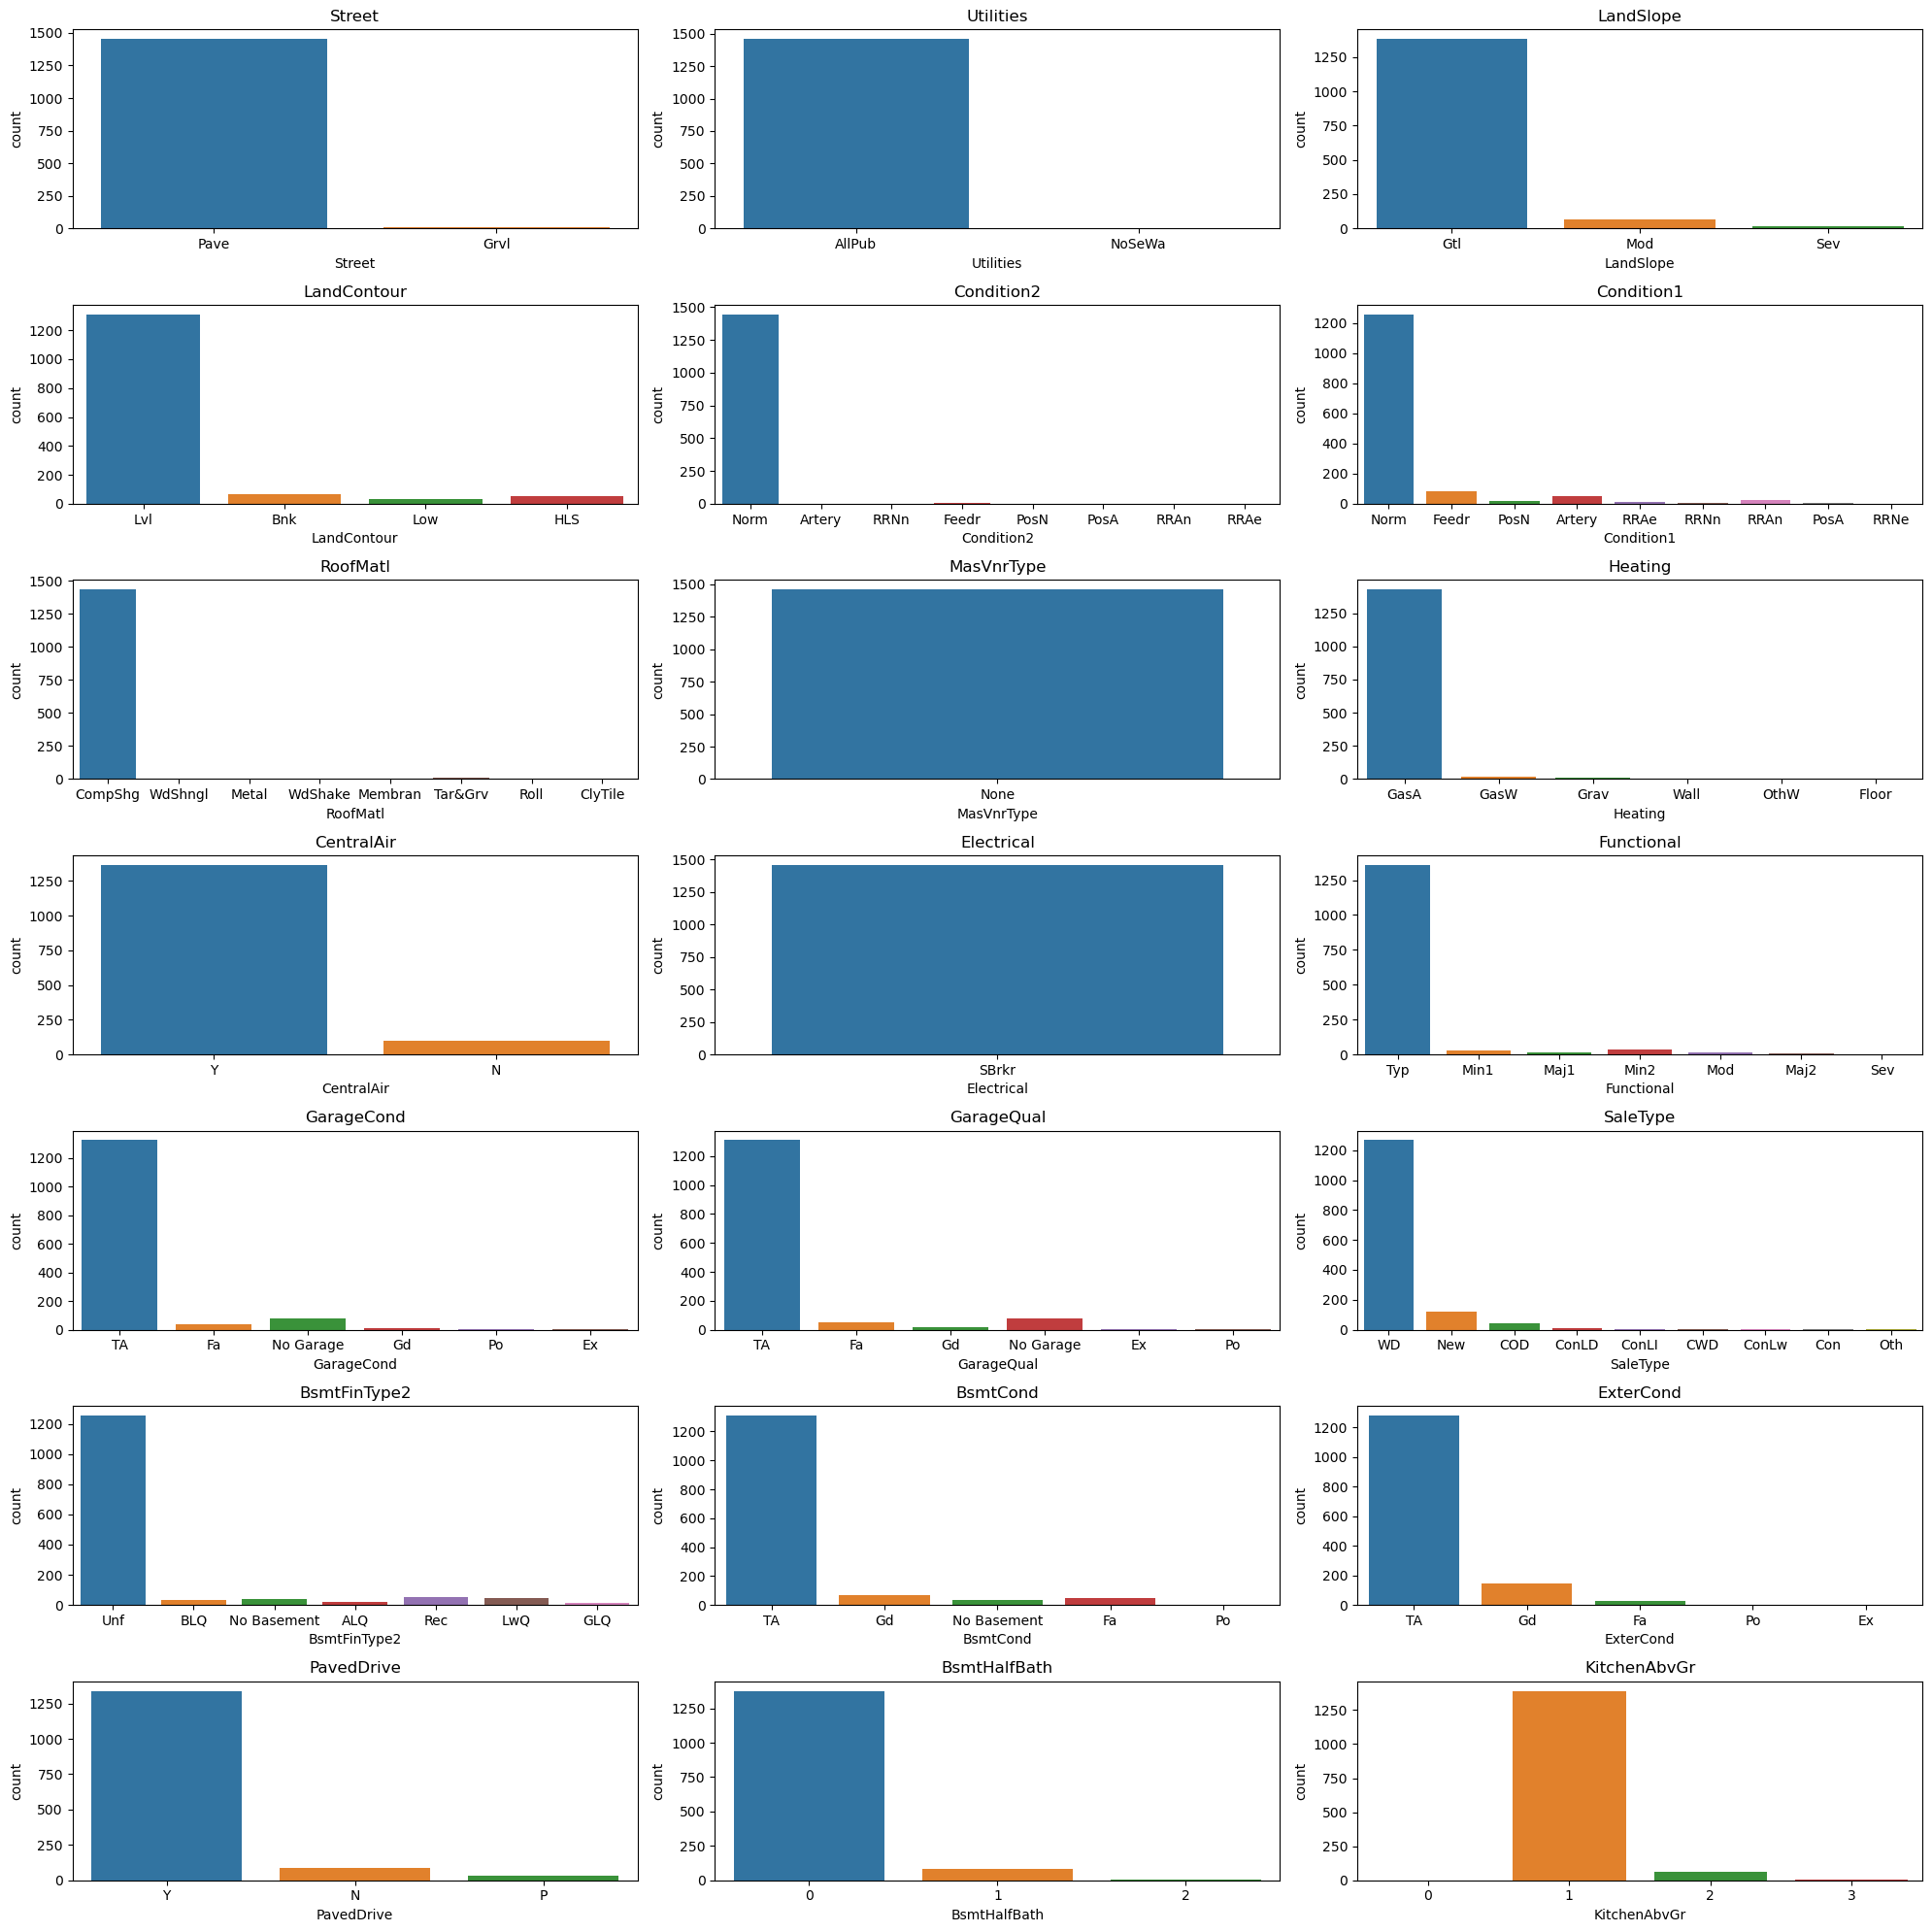

In [20]:
# Visualizing all the columns with imbalances in frequency distribution (as found in the above step)

col=['Street','Utilities','LandSlope','LandContour','Condition2','Condition1','RoofMatl','MasVnrType','Heating','CentralAir','Electrical','Functional','GarageCond','GarageQual','SaleType','BsmtFinType2','BsmtCond','ExterCond','PavedDrive','BsmtHalfBath','KitchenAbvGr']
count_plot_vertical(col,7,3)

#### Observations: 
As we can see these variables have one of the cateories exhibiting more than 90% frequency. We can drop them as they are not able to explain the sale prize based on categorization because of uneven frequency. MsVnrType and Electrical have 100% presence on one category while the others are not present at all. 
Dropping these coulmns.

In [21]:
# Dropping the categorical columns with high uneven frequency distribution

df=df.drop(col, axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd       196.0        Gd      PConc       Gd           No   
1     MetalSd         0.0        TA     CBlock       Gd           Gd   
2     VinylSd       162.0        Gd      PConc       Gd           Mn   
3     Wd Shng         0.0        TA     BrkTil       TA           No   
4     VinylSd       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0          GLQ         706           0        150          856        Ex   
1          ALQ         978           0        284         1262        Ex   
2          GLQ         486           0        434          920        Ex   
3          ALQ         216           0        540          756        Gd   
4          GLQ         655           0        490         1145        Ex   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
0       856       854             0       1710             1         2   
1      1262         0             0       1262             0         2   
2       920       866             0       1786             1         2   
3       961       756             0       1717             1         1   
4      1145      1053             0       2198             1         2   

   HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu  \
0         1             3          Gd             8           0  No Fireplace   
1         0             3          TA             6           1            TA   
2         1             3          Gd             6           1            TA   
3         0             3          Gd             7           1            Gd   
4         1             4          Gd             9           1            TA   

  GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     Attchd          RFn           2         548           0           61   
1     Attchd          RFn           2         460         298            0   
2     Attchd          RFn           2         608           0           42   
3     Detchd          Unf           3         642           0           35   
4     Attchd          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence  MiscVal  MoSold  \
0              0          0            0         0  No Fence        0       2   
1              0          0            0         0  No Fence        0       5   
2              0          0            0         0  No Fence        0       9   
3            272          0            0         0  No Fence        0       2   
4              0          0            0         0  No Fence        0      12   

  SaleCondition  SalePrice  HouseAge  GarageAge  RemodelAge  
0        Normal     208500         5        5.0           5  
1        Normal     181500        31       31.0          31  
2        Normal     223500         7        7.0           6  
3       Abnorml     140000        91        8.0          

In [22]:
categorical_cols = [ele for ele in categorical_cols_init if ele not in col]
print(categorical_cols)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleCondition', 'Fence', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'HalfBath', 'PoolArea', 'MoSold']


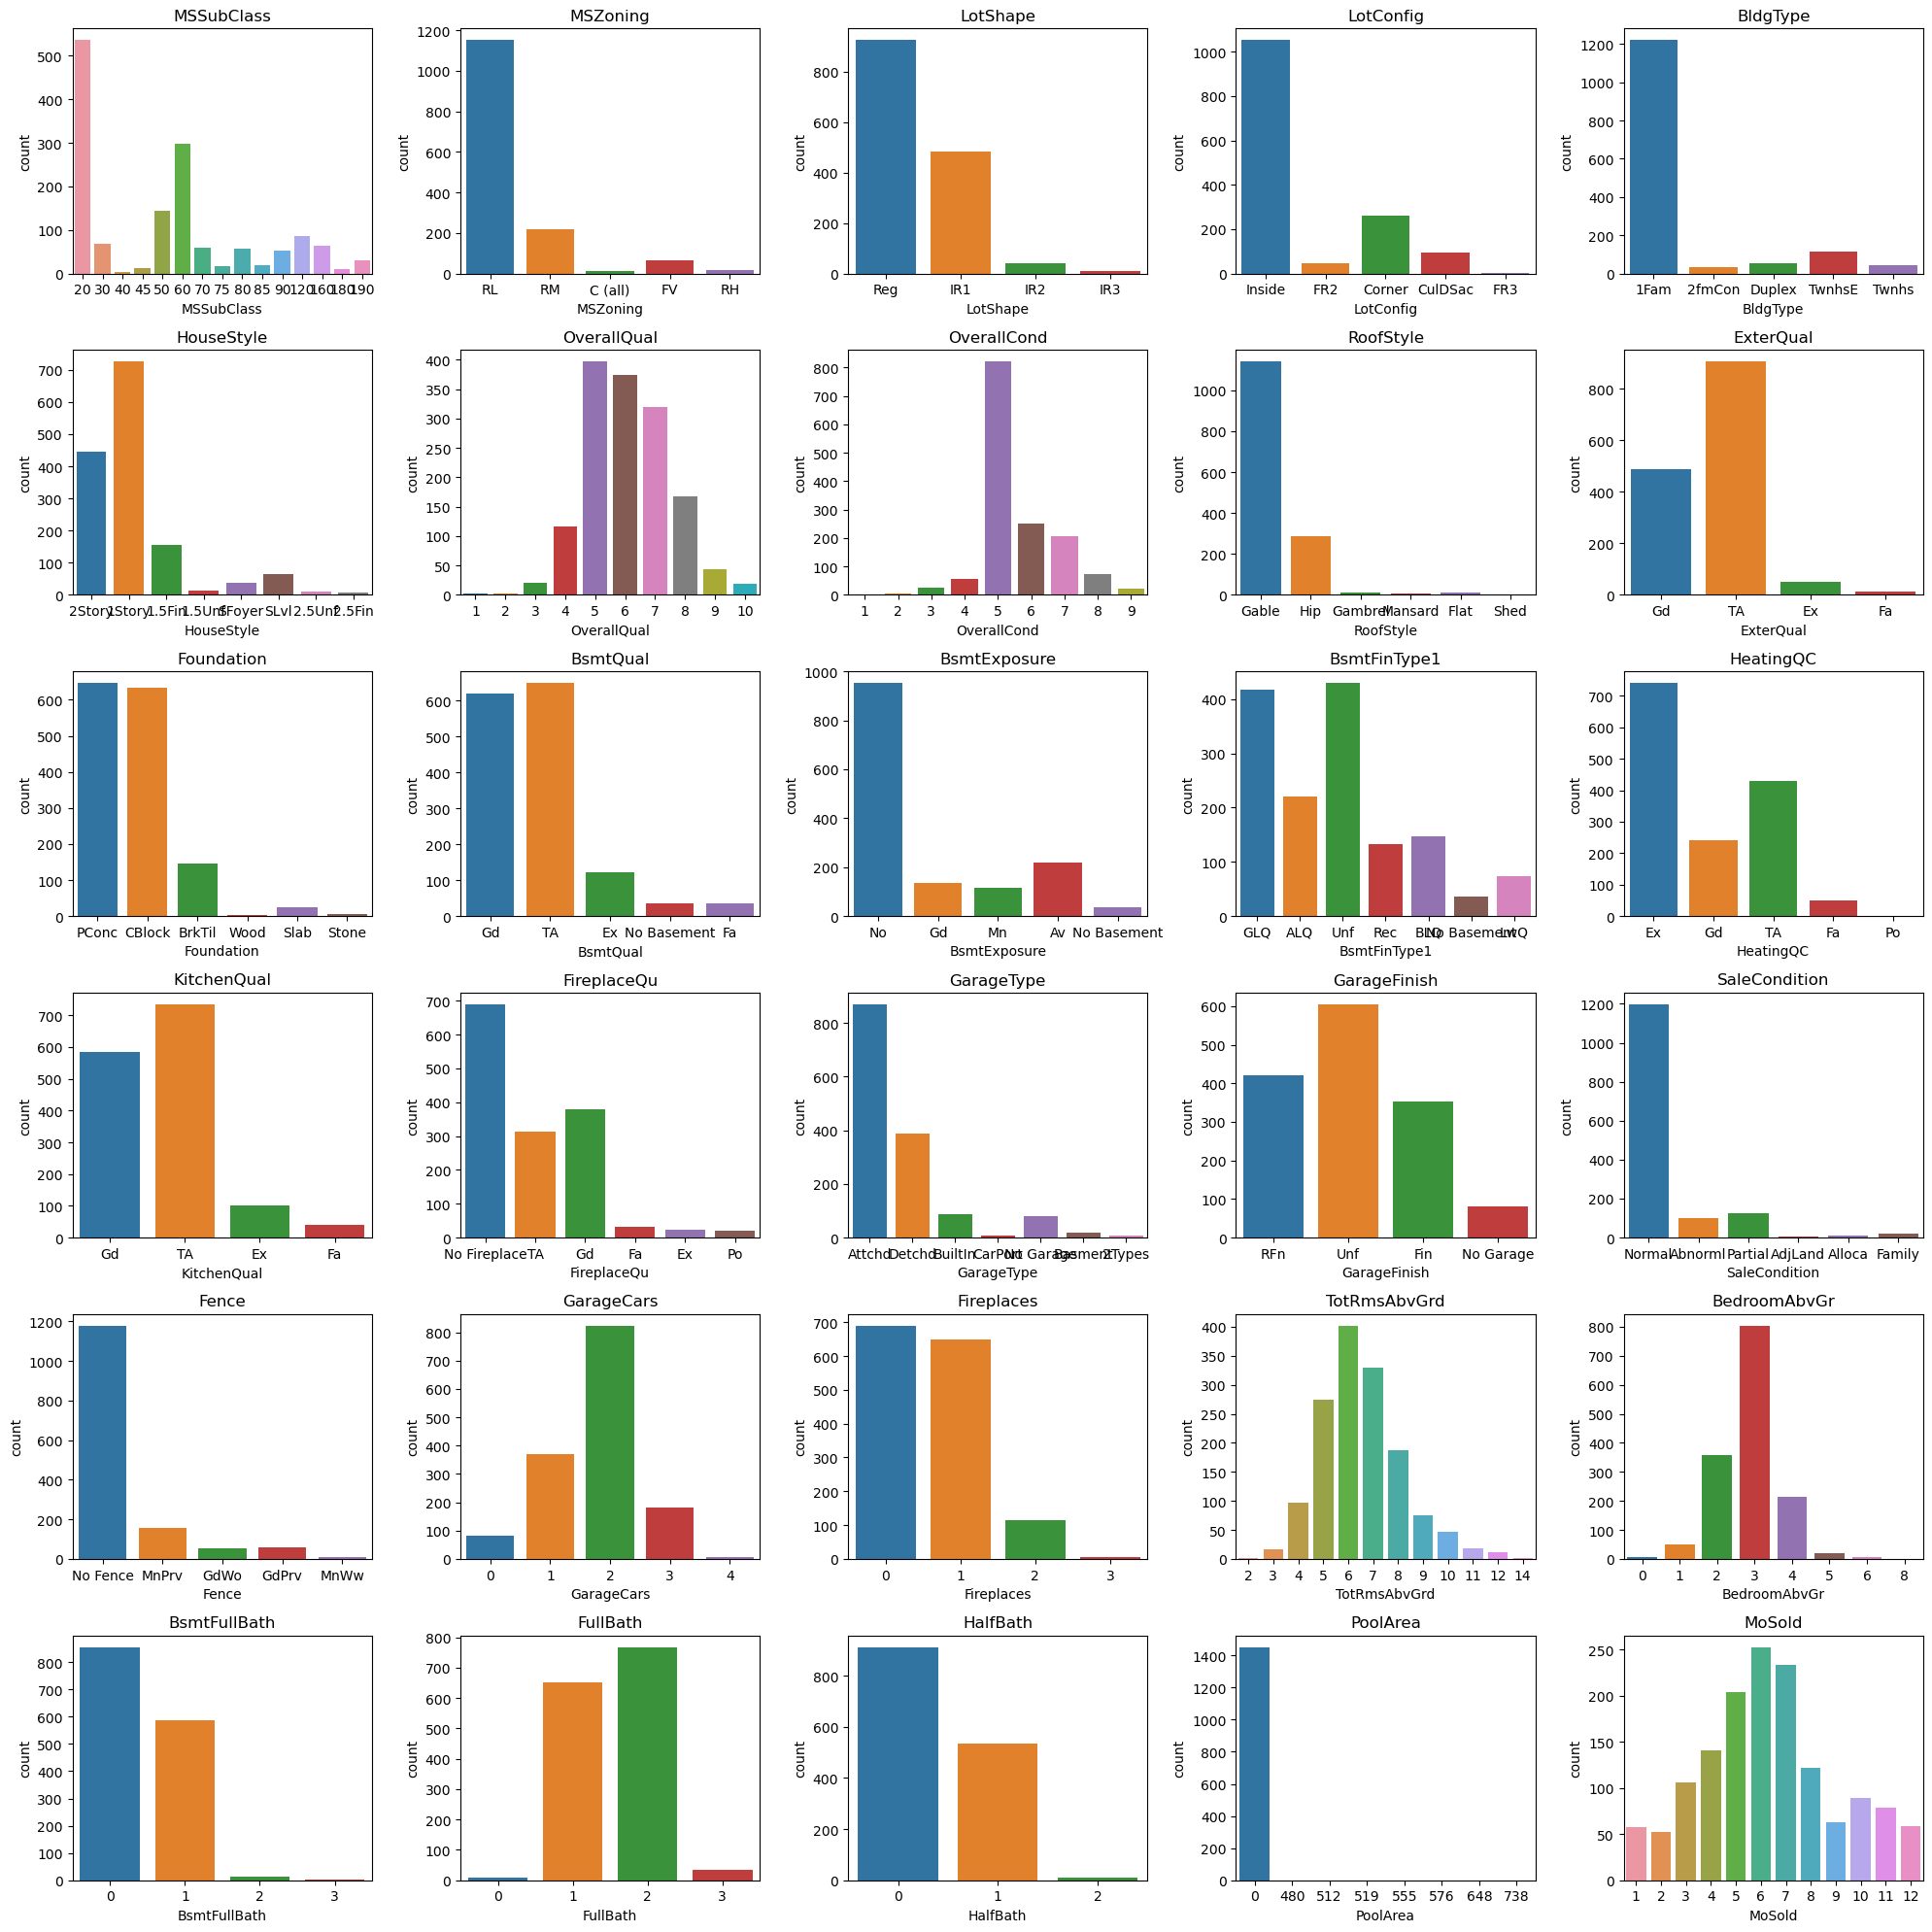

In [23]:
cols=['MSSubClass', 'MSZoning', 'LotShape','LotConfig','BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleCondition', 'Fence','GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'HalfBath', 'PoolArea', 'MoSold']
count_plot_vertical(cols,6,5)

#### Observations: 
1. 80% of house have no fence 
2. 87% of the sake type is Warranty Deed - Conventional
3. 82% of thr SaleCondition is Normal
4. Quality of the material on the exterior is mostly Average/Typical about 47% of the houses 
5. the height of the basement is around 80-99 inches
6. Heating quality and condition is mostly excellent for 50% of the houses
7. Garage quality is Average for 90% houses
8. KitchenQuality is Average for 50% houses
9. 47% of the house have no Fireplace


#### 5.2 Continous Variables 

We have the below conrinous variables in data

1. LotFrontage: Linear feet of street connected to property
2. LotArea: Lot size in square feet
3. HouseAge: year Sold - Year Built
4. RemodelAge: year sold - year remodeled
5. BsmtFinSF1: Type 1 finished square feet
6. BsmtFinSF2: Type 2 finished square feet
7. BsmtUnfSF: Unfinished square feet of basement area
8. TotalBsmtSF: Total square feet of basement area
9. 1stFlrSF: First Floor square feet
10. 2ndFlrSF: Second floor square feet
11. LowQualFinSF: Low quality finished square feet (all floors)
12. GrLivArea: Above grade (ground) living area square feet
13. GarageAge: year sold - GarageYrBlt
14. GarageArea: Size of garage in square feet
15. WoodDeckSF: Wood deck area in square feet
16. OpenPorchSF: Open porch area in square feet
17. EnclosedPorch: Enclosed porch area in square feet
18. 3SsnPorch: Three season porch area in square feet
19. ScreenPorch: Screen porch area in square feet
20. MiscVal: Value of miscellaneous feature
21. SalePrice : price sold for 
22. MasVnrArea: Masonry veneer area in square feet

In [24]:
df_continuous = df.select_dtypes(include=['int64', 'float64'])
#removing numeric categorical varibles
df_continuous.drop(['MSSubClass','OverallQual','OverallCond','GarageCars','Fireplaces','TotRmsAbvGrd','BedroomAbvGr','BsmtFullBath','FullBath','HalfBath','PoolArea','MoSold'], axis=1, inplace=True)
df_continuous.shape

(1460, 22)

In [25]:
df_continuous.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  HouseAge  GarageAge  RemodelAge  
0     208500         5        5.0           5  
1     181500        31       31.0          31  
2     223500         7        7.0           6  
3     140000        91        8.0          36  
4     250000         8        8.0           8

In [26]:
cols_numeric = df_continuous.columns
print(cols_numeric)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'HouseAge',
       'GarageAge', 'RemodelAge'],
      dtype='object')


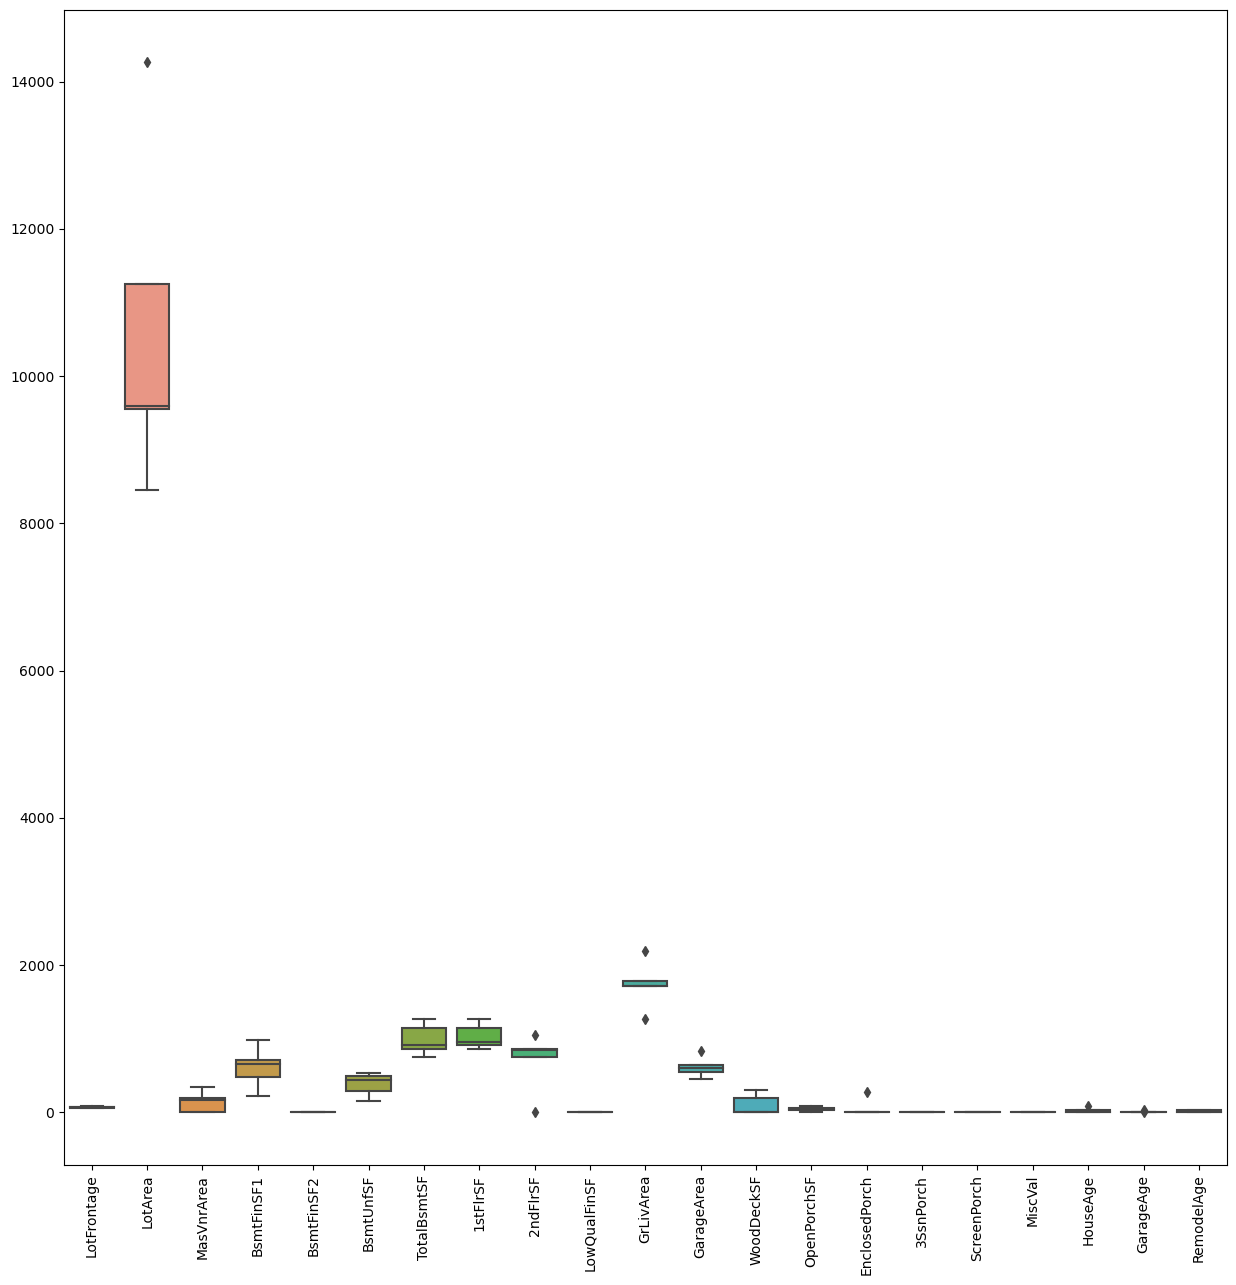

In [27]:
## Check the boxplots to view outliers in numerical columns
df_cont=df_continuous.drop(['SalePrice'], axis=1)
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_cont.head());


#### Observation: 
1. outliers observed in lotFrontage
2. outliers observed in LotArea
3. outliers observed in GrLivArea
4. There are also minor outliers in few more variables
5. Lets plot individual boxplots to identify better.

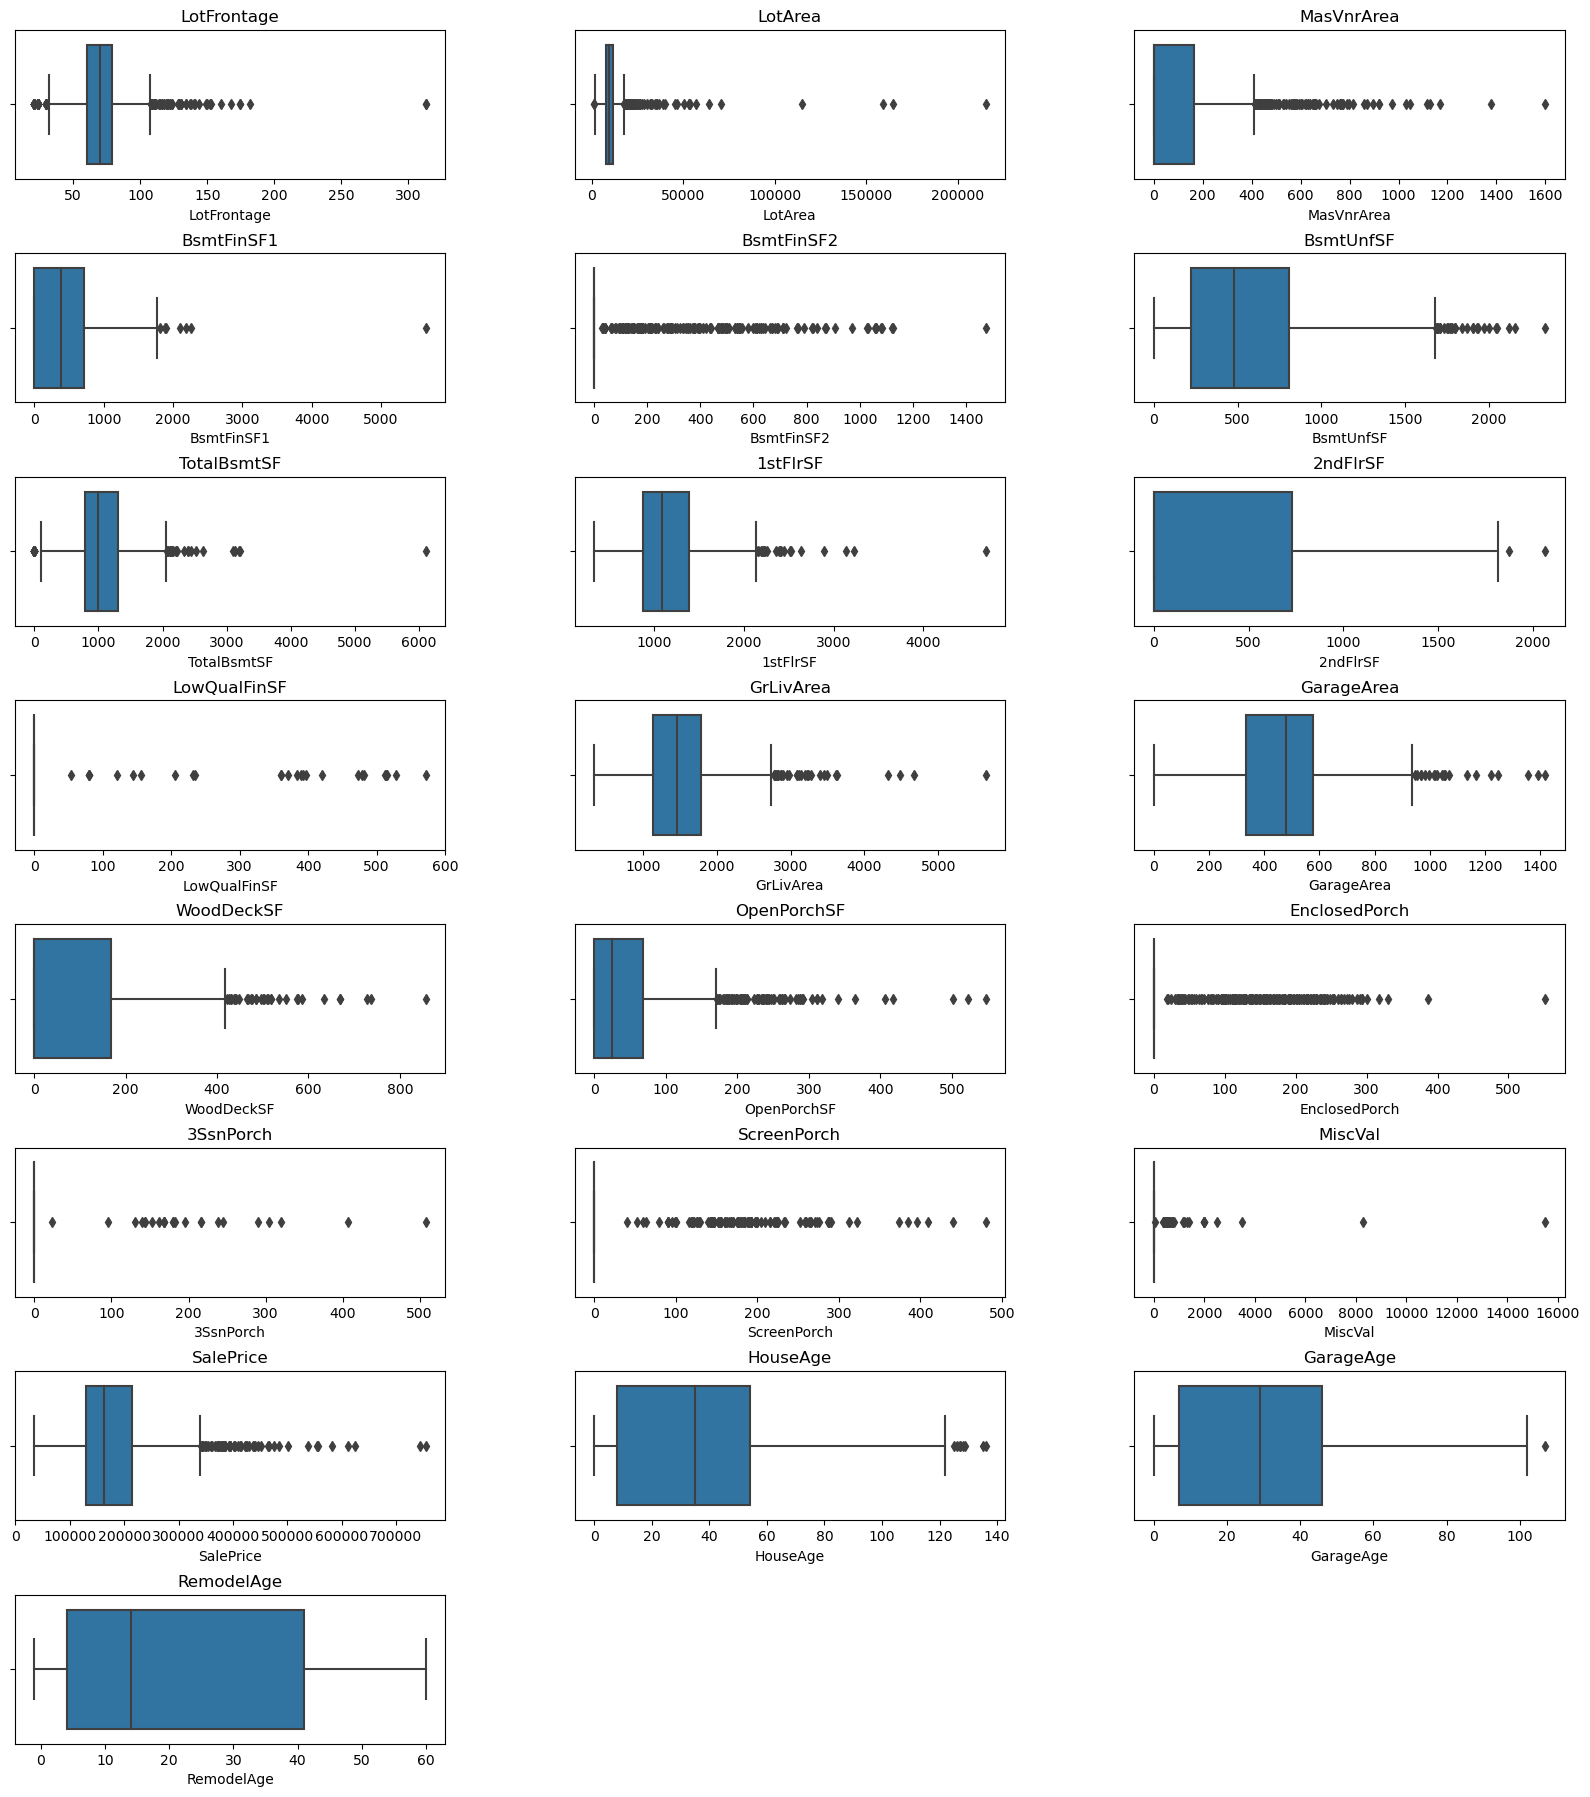

In [28]:
#Box plot visualization - OUTLIERS
plt.figure(figsize=(20, 60), dpi=100)

idx = 0
for col in cols_numeric:
    idx = idx + 1
    plt.subplot(21,3,idx)
    sns.boxplot(x=df[col])
    plt.title(col, fontsize=12)


plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

We can see Outliers clearly now. We need to address them in LotFrontage, LotArea,MasVnrArea and GrLivArea where there are few outliers in the higher quantile.Lets get rid of the outliers. 
Our Target Variable SalePrice also seems to have outliers in the last quantile.

Lets view the target variable SalePrice

In [29]:
# Numerical summary 
numerical_summary('SalePrice')

Numerical Summary: 
Min : 34900
Max : 755000
25% Data : 129975.0
Mean: 180921.19589041095
75% Data : 214000.0
90% Data : 278000.0
99% Data : 442567.01000000053
100% Data : 755000.0


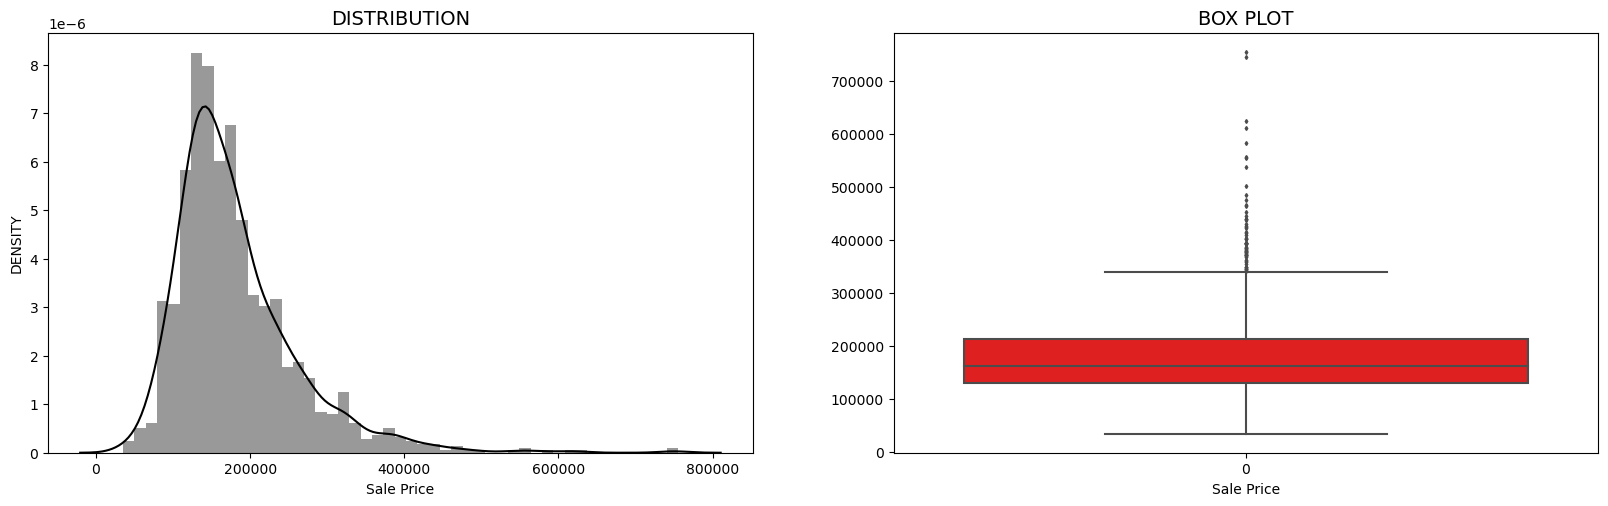

In [30]:
# Distribution plot and outlier plot
dist_plot_box_plot('SalePrice','DISTRIBUTION','BOX PLOT','Sale Price','DENSITY')

In [31]:
df = remove_upper_outliers(df,['LotFrontage','LotArea','MasVnrArea','GrLivArea','SalePrice'])
df.shape

(1233, 55)

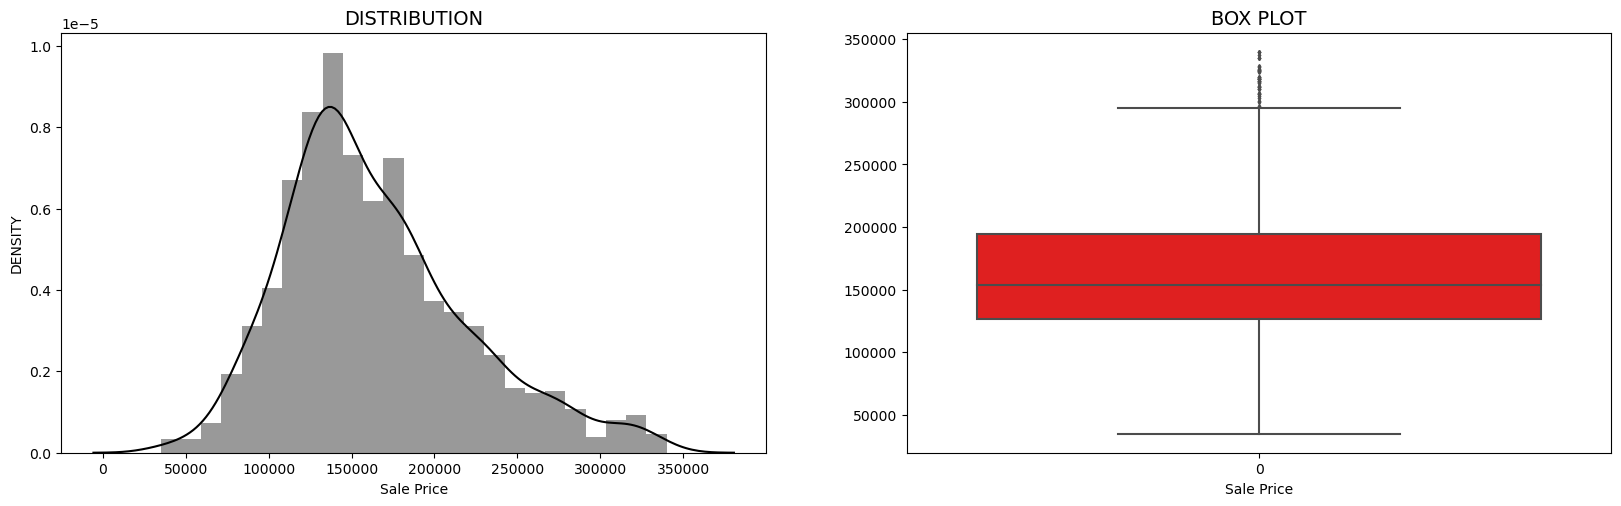

In [32]:
# Distribution plot and outlier plot after outlier removal
dist_plot_box_plot('SalePrice','DISTRIBUTION','BOX PLOT','Sale Price','DENSITY')

### 6:Bivariate Analysis

#### 6.1:Correlation Matrix :
As we have too many predictor variables, we will start with correlation matrix and observe only relevant trends

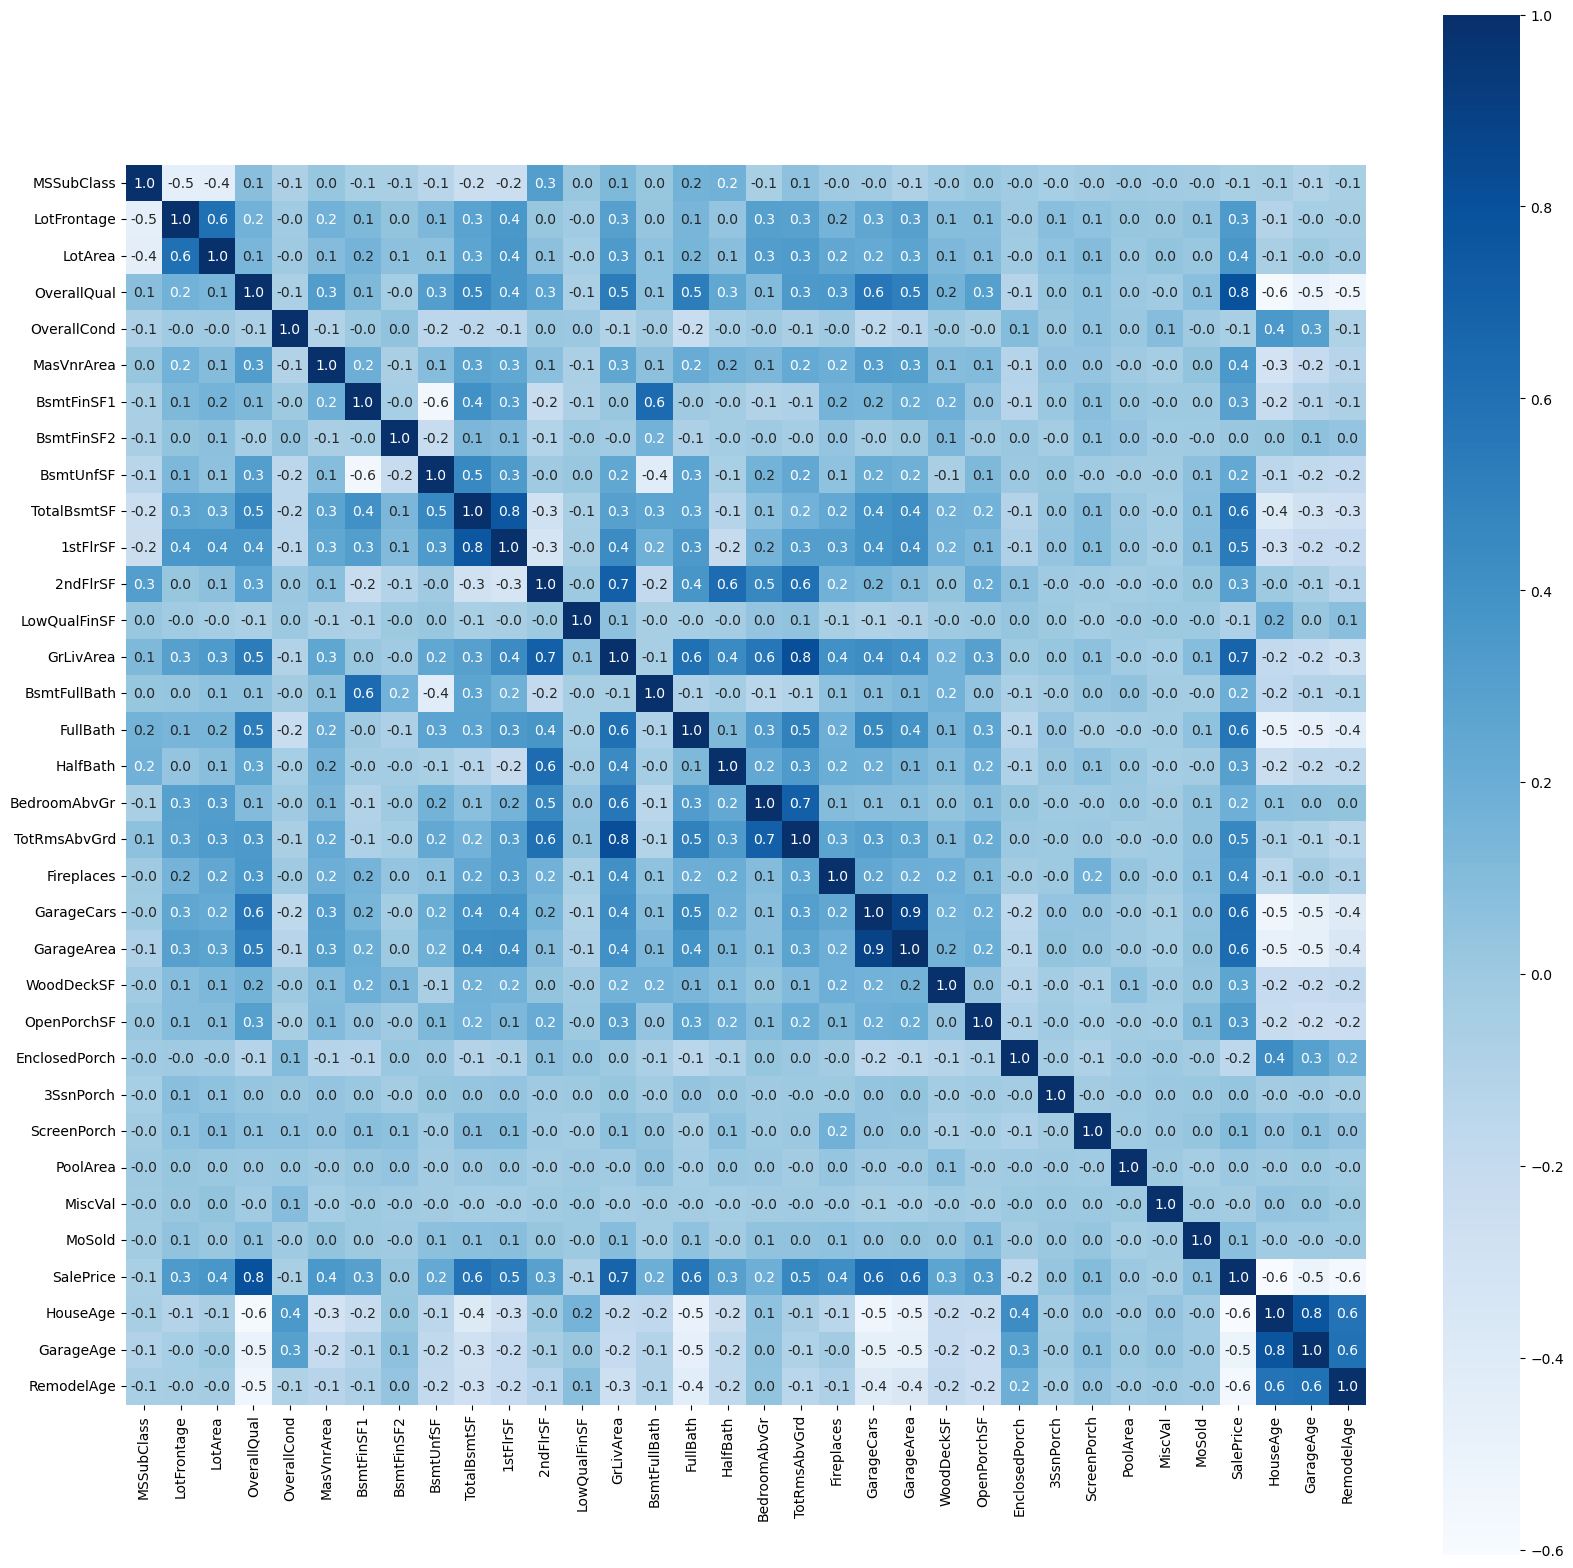

In [33]:
# Creating a correlation heatmap
plt.figure(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt = '.1f',square=True, cmap='Blues')
plt.show()

#### Observations: 
1. OverallQual is very highly and positively correlated with Sale Price.
2. Followed by GrLivArea,FullBath,GarageArea, GarageCars,TotRmsAbvGrd,1stFlrSF,Fireplaces
3. Sales price is also negatively correlated with Garage Age,Remodel Age, House Age. Its expected as the sale price grows down as the houes ages.
4. We can also see that GrLivArea is hisgly correlated with TotRmsAbvGrd,BedroomAbvGr,KitchenAbvGr .This is probably because ground living area is huge ususally if bedrooms and kitchen etc are abpve ground.

Lets see the pair plots of the correlated variables with Sales price

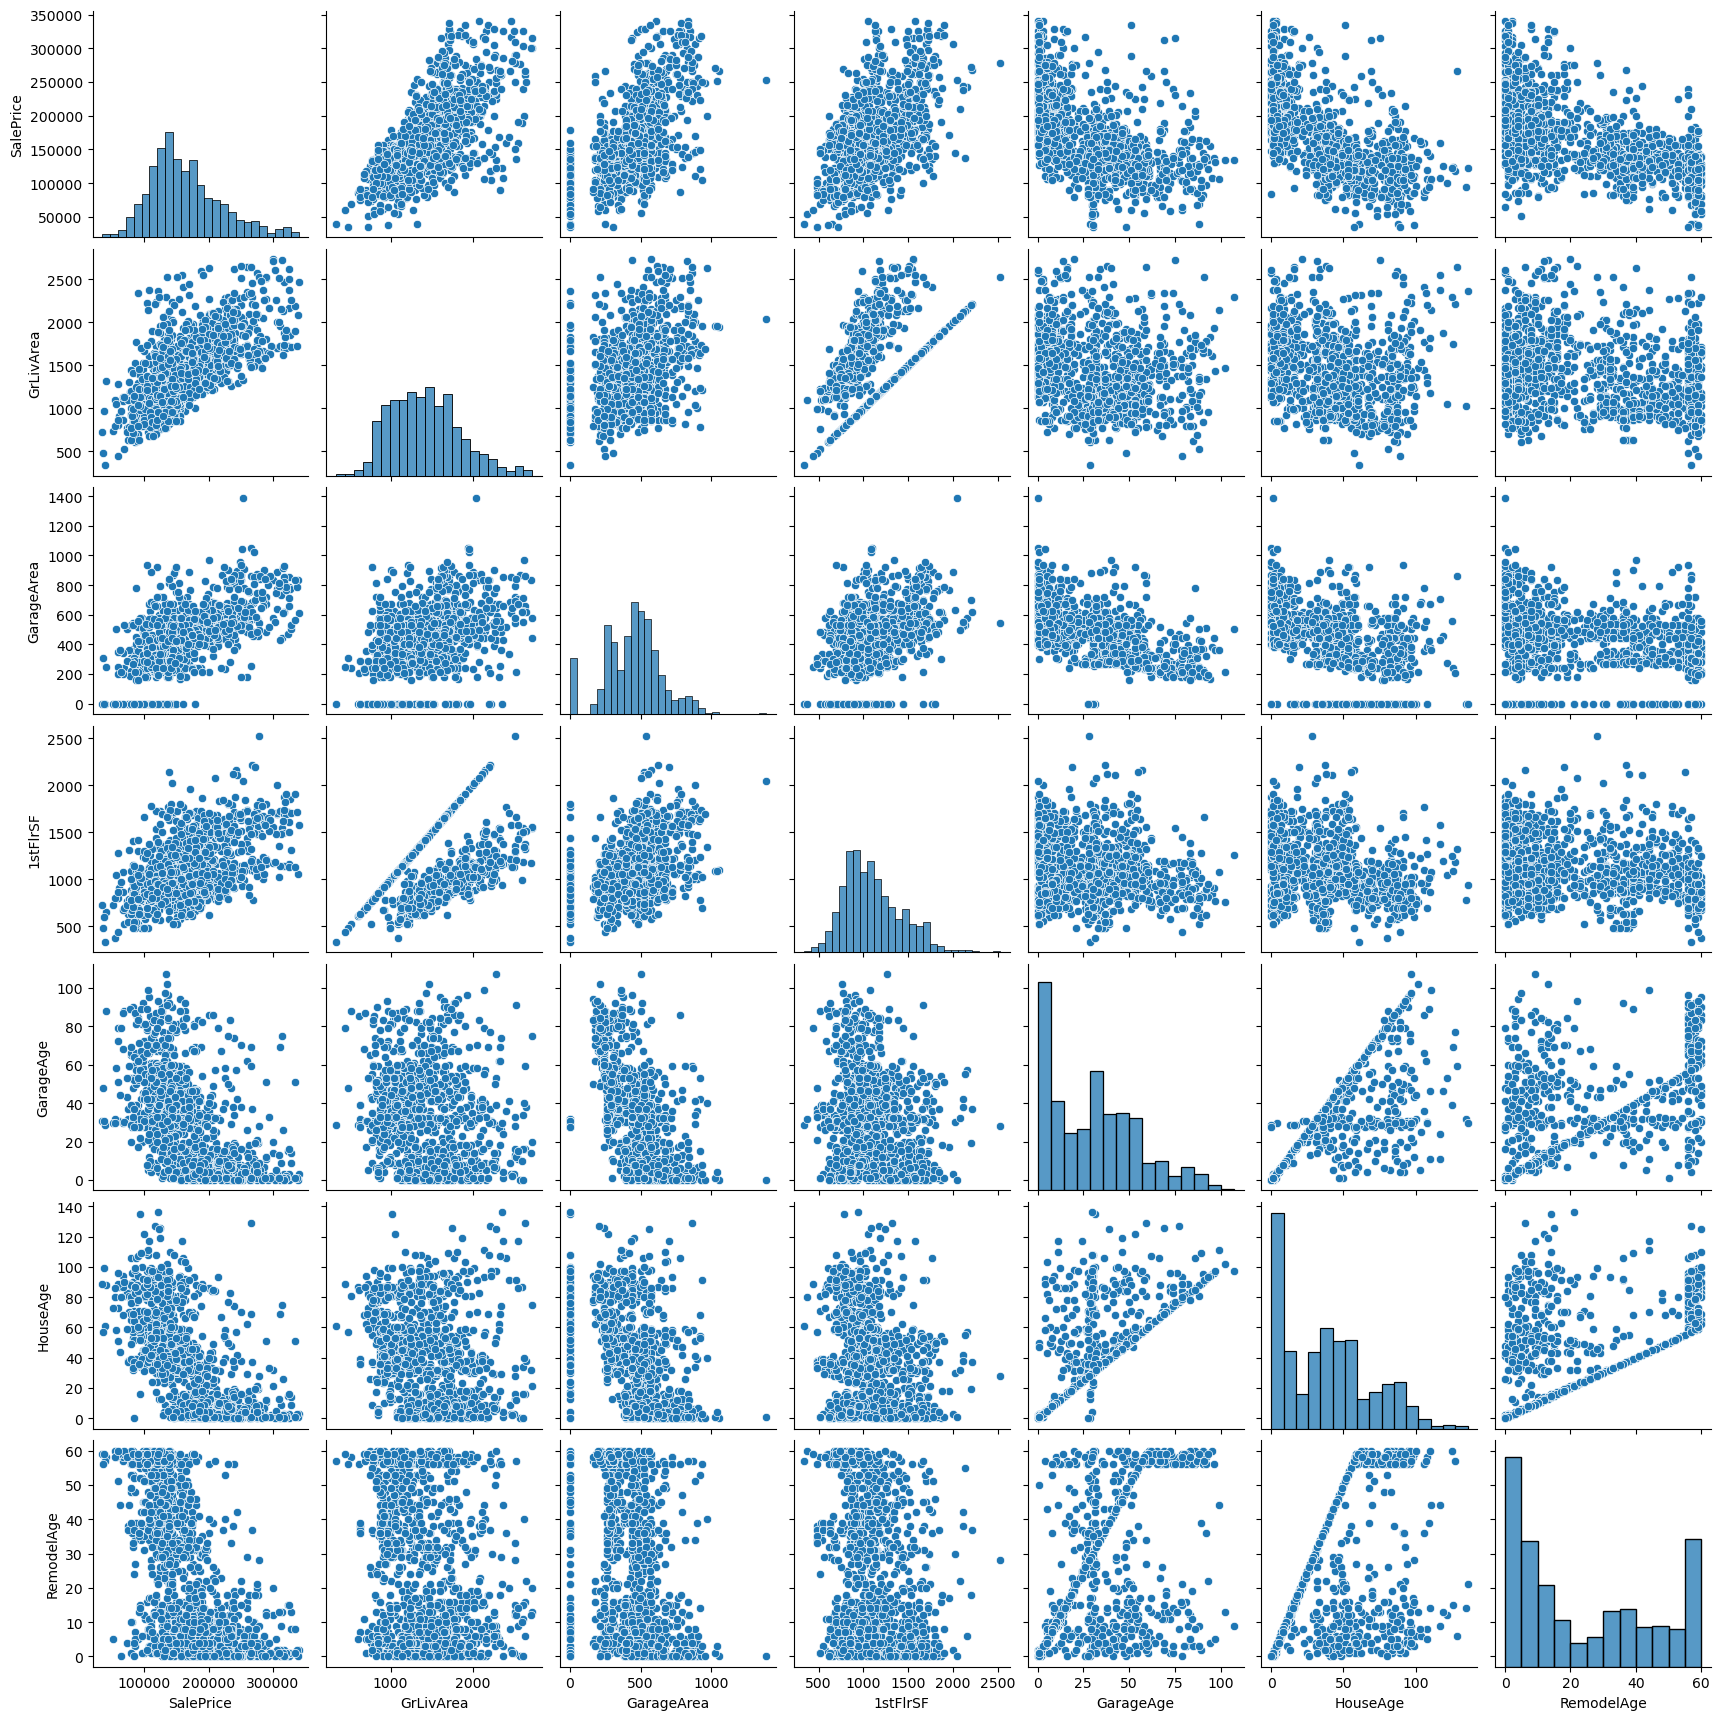

In [34]:
# visualizing, Analysing the numerical columns 'OverallQual','GarageCars'
sns.pairplot(data=df,vars=['SalePrice','GrLivArea','GarageArea','1stFlrSF','GarageAge','HouseAge','RemodelAge'])
plt.show()

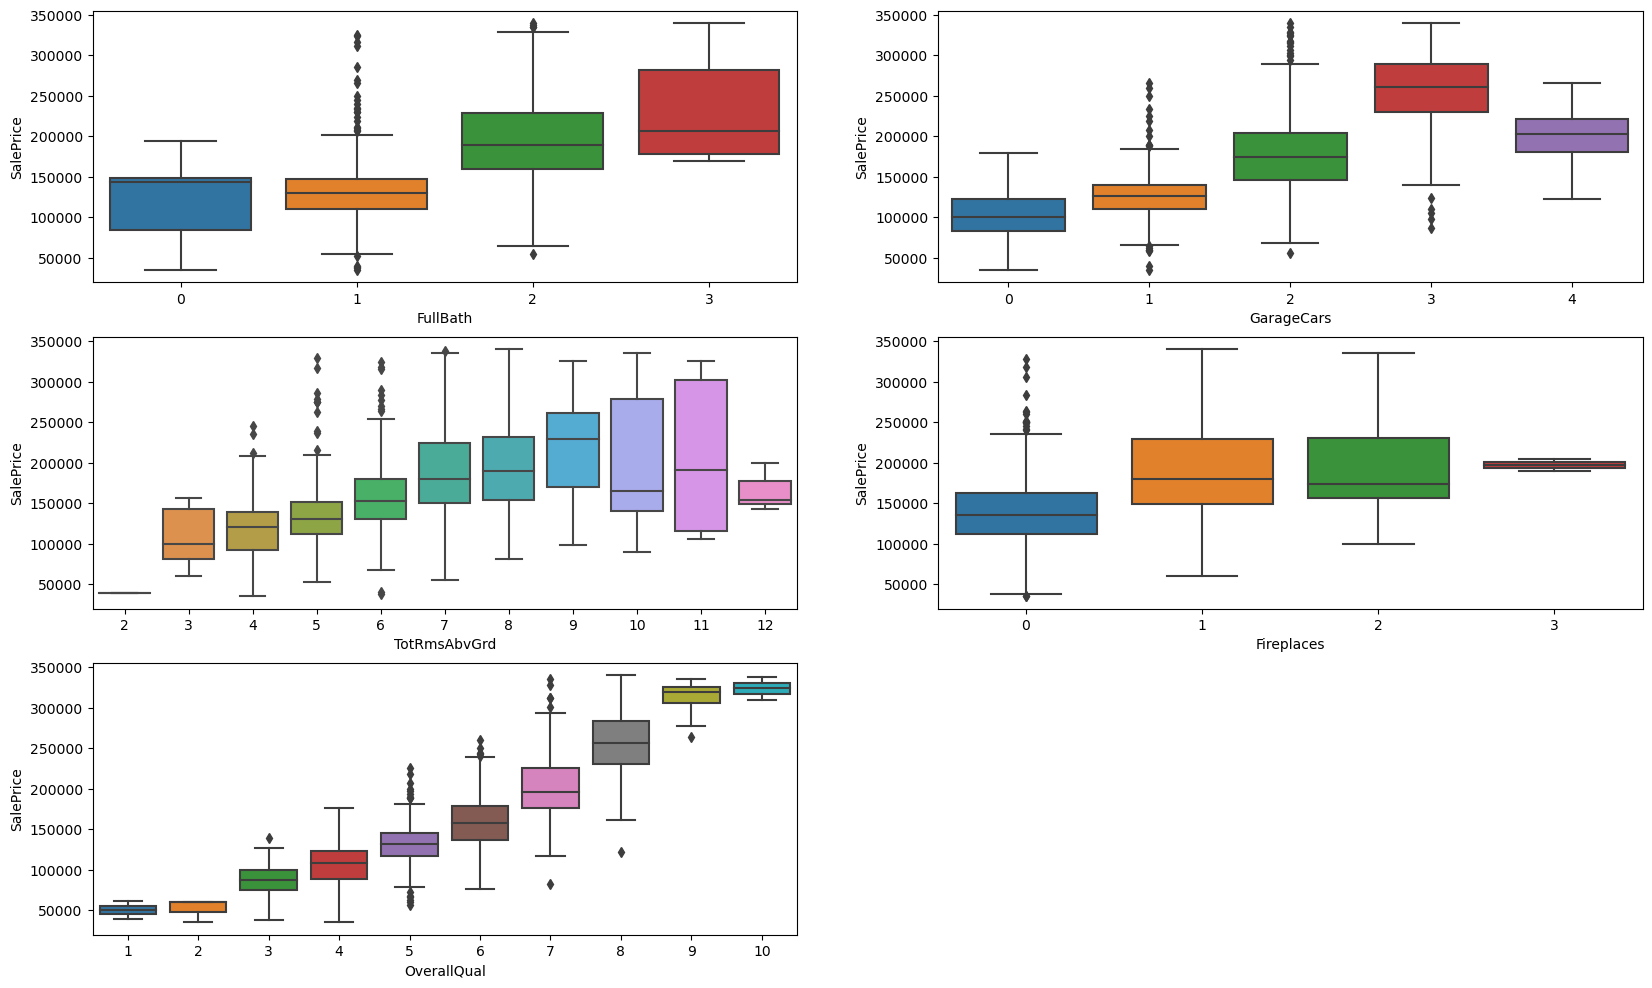

In [35]:
cols=['FullBath','GarageCars','TotRmsAbvGrd','Fireplaces','OverallQual']
box_plot(cols)

#### Observations: 
1. Sale Price increase as Over all Quality increases.
2. Sale price increses as Total rooms above grade are around 9 ,10 and 11.
3. Sale Price is highest when garage size can fit 3 cars.
4. Sale price is highest when Full bath rooms are 3.


### 7. Dummy Variable Creation

In [36]:
print(categorical_cols)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'SaleCondition', 'Fence', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'HalfBath', 'PoolArea', 'MoSold']


In [37]:
for column in categorical_cols:
    #Creation of dummy variables and dropping the first one
    dummy_df = pd.get_dummies(df[column], prefix= column, drop_first = True)
    
    #Adding the results to the master dataframe
    df = pd.concat([df, dummy_df], axis=1)

In [38]:
df.shape

(1233, 261)

In [39]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0     VinylSd       196.0        Gd      PConc       Gd           No   
1     MetalSd         0.0        TA     CBlock       Gd           Gd   
2     VinylSd       162.0        Gd      PConc       Gd           Mn   
3     Wd Shng         0.0        TA     BrkTil       TA           No   
4     VinylSd       350.0        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0          GLQ         706           0        150          856        Ex   
1          ALQ         978           0        284         1262        Ex   
2          GLQ         486           0        434          920        Ex   
3          ALQ         216           0        540          756        Gd   
4          GLQ         655           0        490         1145        Ex   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
0       856       854             0       1710             1         2   
1      1262         0             0       1262             0         2   
2       920       866             0       1786             1         2   
3       961       756             0       1717             1         1   
4      1145      1053             0       2198             1         2   

   HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu  \
0         1             3          Gd             8           0  No Fireplace   
1         0             3          TA             6           1            TA   
2         1             3          Gd             6           1            TA   
3         0             3          Gd             7           1            Gd   
4         1             4          Gd             9           1            TA   

  GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     Attchd          RFn           2         548           0           61   
1     Attchd          RFn           2         460         298            0   
2     Attchd          RFn           2         608           0           42   
3     Detchd          Unf           3         642           0           35   
4     Attchd          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea     Fence  MiscVal  MoSold  \
0              0          0            0         0  No Fence        0       2   
1              0          0            0         0  No Fence        0       5   
2              0          0            0         0  No Fence        0       9   
3            272          0            0         0  No Fence        0       2   
4              0          0            0         0  No Fence        0      12   

  SaleCondition  SalePrice  HouseAge  GarageAge  RemodelAge  MSSubClass_30  \
0        Normal     208500         5        5.0           5              0   
1        Normal     181500        31       31.0          31              0   
2        Normal     223500         7        7.0           6            

In [40]:
#Dropping the original categorical columns 
for column in categorical_cols:
   df = df.drop(column, 1)

In [41]:
df.shape

(1233, 228)

### 8: Data Preparation

#### 8.1 Data Split- Training and Testing Sets


In [42]:
# split the dataframe into Train and Test sets 70/30
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100) 

In [43]:
df_train.shape

(863, 228)

In [44]:
df_test.shape

(370, 228)

#### 8.2. Feature scaling on df_train

In [45]:
scaler = MinMaxScaler()

print(cols_numeric)

df_train[cols_numeric] = scaler.fit_transform(df_train[cols_numeric])

# head after scaling
df_train.head()


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'HouseAge',
       'GarageAge', 'RemodelAge'],
      dtype='object')


LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
288     0.570348  0.522638    0.075610    0.277949    0.000000   0.211557   
729     0.360465  0.303067    0.000000    0.093885    0.000000   0.307542   
265     0.662791  0.661963    0.512195    0.363187    0.154681   0.296768   
553     0.534884  0.458712    0.000000    0.000000    0.000000   0.000000   
681     0.395349  0.196319    0.000000    0.112415    0.000000   0.299216   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
288     0.275109  0.258447  0.000000      0.000000   0.236227    0.201439   
729     0.243294  0.234703  0.000000      0.681818   0.364775    0.387770   
265     0.443543  0.496804  0.000000      0.000000   0.454090    0.414388   
553     0.000000  0.361644  0.000000      0.000000   0.330551    0.374101   
681     0.247349  0.234703  0.417132      0.000000   0.494992    0.202158   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
288       0.000     0.000000       0.000000        0.0          0.0      0.0   
729       0.000     0.043977       0.290155        0.0          0.0      0.0   
265       0.375     0.000000       0.000000        0.0          0.0      0.0   
553       0.000     0.183556       0.000000        0.0          0.0      0.0   
681       0.000     0.000000       0.145078        0.0          0.0      0.0   

     SalePrice  HouseAge  GarageAge  RemodelAge  MSSubClass_30  MSSubClass_40  \
288   0.285480  0.316176   0.373832    0.716667              0              0   
729   0.223206  0.617647   0.439252    0.983333              1              0   
265   0.460833  0.198529   0.252336    0.450000              0              0   
553   0.239594  0.441176   0.065421    0.100000              0              0   
681   0.408174  0.566176   0.383178    0.150000              0              0   

     MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
288              0              0              0              0   
729              0              0              0              0   
265              0              0              0              0   
553              0              0              0              0   
681              0              1              0              0   

     MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
288              0              0              0              0   
729              0              0              0              0   
265              0              0              0              0   
553              0              0              0              0   
681              0              0              0              0   

     MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
288               0               0               0               0   
729               0               0               0               0   
265               0               0               0               0   
553               0               0               0               0   
681               0               0               0               0   

     MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
288            0            0            1            0             0   
729            0            0            0            1             0   
265            0            0            1            0             0   
553            0            0            1            0             0   
681            0            1            0            0             1   

     LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
288             0             0                  0              0   
729             0             1                  0              0   
265             0             0                  0              0   
553             0             1                  0              0   
681             0             0                  0              0   

     LotConfig_FR3  LotC

In [46]:
df_train.describe()

LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
count   863.000000  863.000000  863.000000  863.000000  863.000000   
mean      0.531114    0.472020    0.156433    0.246110    0.029988   
std       0.183536    0.184525    0.255075    0.237309    0.104229   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.453488    0.362178    0.000000    0.000000    0.000000   
50%       0.569767    0.474663    0.000000    0.218653    0.000000   
75%       0.627907    0.582822    0.258537    0.410130    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

        BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  LowQualFinSF  \
count  863.000000   863.000000  863.000000  863.000000    863.000000   
mean     0.269393     0.309655    0.349330    0.206729      0.005985   
std      0.205073     0.114076    0.144949    0.257510      0.063257   
min      0.000000     0.000000    0.000000    0.000000      0.000000   
25%      0.103820     0.243294    0.242009    0.000000      0.000000   
50%      0.231636     0.294448    0.326027    0.000000      0.000000   
75%      0.379530     0.370555    0.432877    0.451583      0.000000   
max      1.000000     1.000000    1.000000    1.000000      1.000000   

        GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  863.000000  863.000000  863.000000   863.000000     863.000000   
mean     0.459613    0.324364    0.114488     0.079841       0.052510   
std      0.182026    0.145189    0.156496     0.116774       0.147532   
min      0.000000    0.000000    0.000000     0.000000       0.000000   
25%      0.317613    0.221583    0.000000     0.000000       0.000000   
50%      0.445743    0.331655    0.000000     0.034417       0.000000   
75%      0.576795    0.405755    0.211277     0.116635       0.000000   
max      1.000000    1.000000    1.000000     1.000000       1.000000   

        3SsnPorch  ScreenPorch     MiscVal   SalePrice    HouseAge  \
count  863.000000   863.000000  863.000000  863.000000  863.000000   
mean     0.005534     0.031684    0.010444    0.429773    0.277759   
std      0.055098     0.123685    0.069302    0.185427    0.220995   
min      0.000000     0.000000    0.000000    0.000000    0.000000   
25%      0.000000     0.000000    0.000000    0.305146    0.058824   
50%      0.000000     0.000000    0.000000    0.393641    0.264706   
75%      0.000000     0.000000    0.000000    0.524746    0.419118   
max      1.000000     1.000000    1.000000    1.000000    1.000000   

        GarageAge  RemodelAge  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
count  863.000000  863.000000     863.000000     863.000000     863.000000   
mean     0.282720    0.391116       0.054461       0.001159       0.009270   
std      0.225312    0.343532       0.227057       0.034040       0.095889   
min      0.000000    0.000000       0.000000       0.000000       0.000000   
25%      0.074766    0.083333       0.000000       0.000000       0.000000   
50%      0.275643    0.266667       0.000000       0.000000       0.000000   
75%      0.429907    0.700000       0.000000       0.000000       0.000000   
max      1.000000    1.000000       1.000000       1.000000       1.000000   

       MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
count     863.000000     863.000000     863.000000     863.000000   
mean        0.098494       0.198146       0.046350       0.008111   
std         0.298154       0.398834       0.210364       0.089748   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       MSSubClass_80  MSSubClass_85  MSSubClass_90  MSSubClass_120  \
count     863.000000     863.000000     863

#### 8.3.  derive X_train and y_train
Since the target variable is 'SalePrice',

y_train will be populated with SalePrice
X_train will be populated with rest of the predictor variables other than SalePrice.

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
288     0.570348  0.522638    0.075610    0.277949    0.000000   0.211557   
729     0.360465  0.303067    0.000000    0.093885    0.000000   0.307542   
265     0.662791  0.661963    0.512195    0.363187    0.154681   0.296768   
553     0.534884  0.458712    0.000000    0.000000    0.000000   0.000000   
681     0.395349  0.196319    0.000000    0.112415    0.000000   0.299216   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
288     0.275109  0.258447  0.000000      0.000000   0.236227    0.201439   
729     0.243294  0.234703  0.000000      0.681818   0.364775    0.387770   
265     0.443543  0.496804  0.000000      0.000000   0.454090    0.414388   
553     0.000000  0.361644  0.000000      0.000000   0.330551    0.374101   
681     0.247349  0.234703  0.417132      0.000000   0.494992    0.202158   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
288       0.000     0.000000       0.000000        0.0          0.0      0.0   
729       0.000     0.043977       0.290155        0.0          0.0      0.0   
265       0.375     0.000000       0.000000        0.0          0.0      0.0   
553       0.000     0.183556       0.000000        0.0          0.0      0.0   
681       0.000     0.000000       0.145078        0.0          0.0      0.0   

     HouseAge  GarageAge  RemodelAge  MSSubClass_30  MSSubClass_40  \
288  0.316176   0.373832    0.716667              0              0   
729  0.617647   0.439252    0.983333              1              0   
265  0.198529   0.252336    0.450000              0              0   
553  0.441176   0.065421    0.100000              0              0   
681  0.566176   0.383178    0.150000              0              0   

     MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
288              0              0              0              0   
729              0              0              0              0   
265              0              0              0              0   
553              0              0              0              0   
681              0              1              0              0   

     MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
288              0              0              0              0   
729              0              0              0              0   
265              0              0              0              0   
553              0              0              0              0   
681              0              0              0              0   

     MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
288               0               0               0               0   
729               0               0               0               0   
265               0               0               0               0   
553               0               0               0               0   
681               0               0               0               0   

     MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
288            0            0            1            0             0   
729            0            0            0            1             0   
265            0            0            1            0             0   
553            0            0            1            0             0   
681            0            1            0            0             1   

     LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
288             0             0                  0              0   
729             0             1                  0              0   
265             0             0                  0              0   
553             0             1                  0              0   
681             0             0                  0              0   

     LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
288              0          

In [48]:
X_train.shape

(863, 227)

#### 8.4 Feature Selection using RFE(Recursive Feature Elimination)

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)
#running RFE with output param as 30 features to be selected
rfe = RFE(lm,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [50]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]
print(col)

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'HouseAge',
       'MSSubClass_90', 'BldgType_Duplex', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'RoofStyle_Mansard', 'Exterior2nd_Other', 'GarageType_No Garage',
       'GarageFinish_No Garage', 'GarageCars_1', 'TotRmsAbvGrd_11',
       'BsmtFullBath_2', 'HalfBath_2'],
      dtype='object')


### 9.  RFE+Linear Regression

In [51]:
# Dataframe with RFE selected variables
X_train_new = X_train[col]
X_train_new.shape

(863, 25)

In [52]:
# Building First Linear Regression Model
X_train_lm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())
print(calculateVIF(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     262.0
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:40:47   Log-Likelihood:                 1137.2
No. Observations:                 863   AIC:                            -2226.
Df Residuals:                     839   BIC:                            -2112.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

p-value of **2ndFlrSF** is very high. Lets drop it and check the model again

In [53]:

X_train_lm =X_train_lm.drop(['2ndFlrSF'], axis = 1)
lr = sm.OLS(y_train,X_train_lm).fit()
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())
print(calculateVIF(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     273.8
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:40:47   Log-Likelihood:                 1136.5
No. Observations:                 863   AIC:                            -2227.
Df Residuals:                     840   BIC:                            -2118.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Dropping the column MSSubClass_90 due to high VIF

In [54]:
X_train_lm =X_train_lm.drop(['MSSubClass_90'], axis = 1)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())
print(calculateVIF(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     273.8
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:40:47   Log-Likelihood:                 1136.5
No. Observations:                 863   AIC:                            -2227.
Df Residuals:                     840   BIC:                            -2118.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

Dropping column GarageFinish_No Garage due to high VIF

In [55]:
# Building First Linear Regression Model
X_train_lm =X_train_lm.drop(['GarageFinish_No Garage'], axis = 1)
lr = sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())
print(calculateVIF(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     273.8
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:40:47   Log-Likelihood:                 1136.5
No. Observations:                 863   AIC:                            -2227.
Df Residuals:                     840   BIC:                            -2118.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0982 

Dropping column OverallCond_5 due to high VIF

In [56]:
# Building First Linear Regression Model
X_train_lm =X_train_lm.drop(['OverallCond_5'], axis = 1)
lr= sm.OLS(y_train,X_train_lm).fit()
print(lr.summary())
print(calculateVIF(X_train_lm))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     281.4
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:40:47   Log-Likelihood:                 1128.9
No. Observations:                 863   AIC:                            -2214.
Df Residuals:                     841   BIC:                            -2109.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1674 

p-values of all predictors are with in 0.05 and VIF of all factors is less than 5. We can use the model now for predictions. Proceeding to residual analysis and predictions on test data

#### 8.6. Prepare df_test for prediction

In [57]:
scaler = MinMaxScaler()

df_test[cols_numeric] = scaler.fit_transform(df_test[cols_numeric])

y_test = df_test.pop('SalePrice')
X_test = df_test

X_test_new = X_test[col]
X_test_lm = sm.add_constant(X_test_new)
X_test_lm.drop(['2ndFlrSF','MSSubClass_90','GarageFinish_No Garage','OverallCond_5'],axis=1,inplace=True)

In [58]:
X_test_lm.shape

(370, 22)

#### 8.7. Residual Analysis

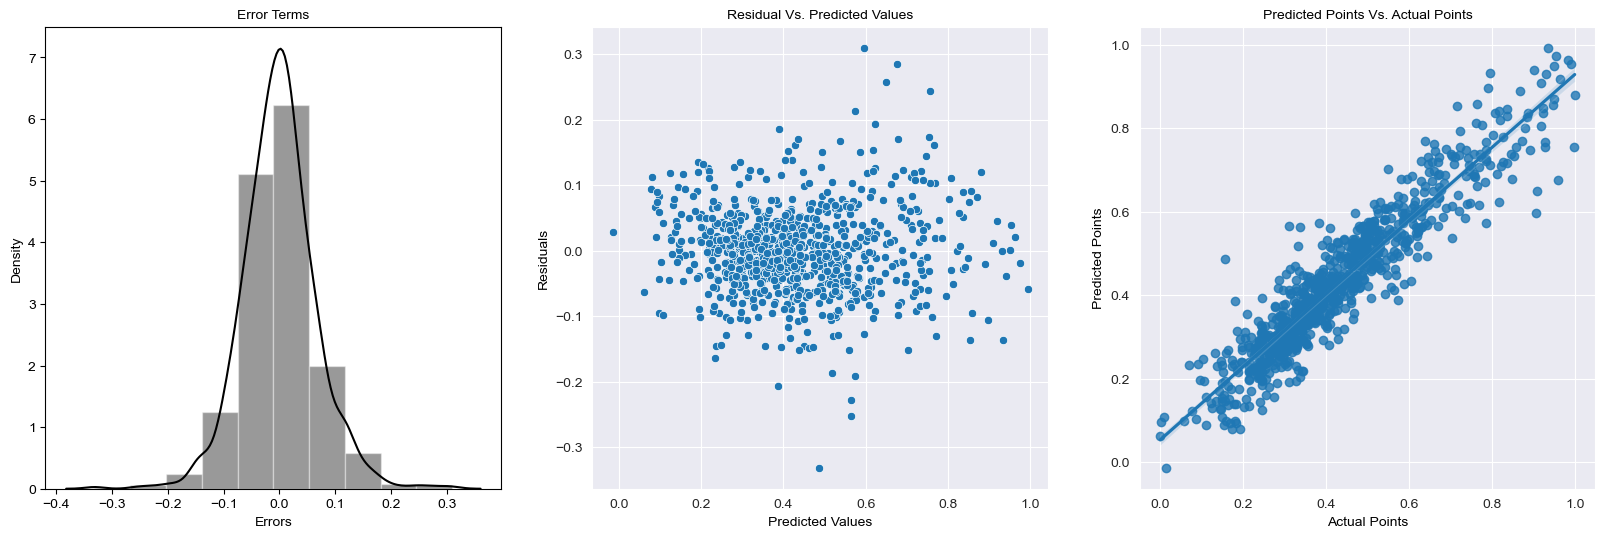

In [59]:
#calculate predicted Y values for the given X values in train dataset
y_pred_train= lr.predict(X_train_lm)
res= y_train - y_pred_train
res_anal(y_pred_train,res)

**We can see that error terms are normally distributed, Independent of each other and also have Homoscedasticity**

#### 8.8. calculatin r2 score on test data

In [60]:
#y_pred_train = lr.predict(X_train_lm)
y_pred_test = lr.predict(X_test_lm)
lr_metric=calc_metrics(y_pred_train,y_pred_test,y_train,y_test)

R2 Train 0.8754046851382462
R2 Test 0.7762377848361308
Residual sum of square Train 3.6928016869720524
Residual sum of square Test 2.9073321883733456
Mean Sqr Error Train 0.004279028605993108
Mean Sqr Error Test 0.007857654563171204


### 10. REF + Ridge Regression

In [61]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ref_ridge = Ridge()

# cross validation
folds = 5
model_ref_ridge = GridSearchCV(estimator = ref_ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ref_ridge.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the better Hyperparameter alpha
print(model_ref_ridge.best_params_)

{'alpha': 0.3}


In [63]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 0.3
ref_ridge = Ridge(alpha=alpha)

ref_ridge.fit(X_train_lm, y_train)

Ridge(alpha=0.3)

#### Residual Analysis

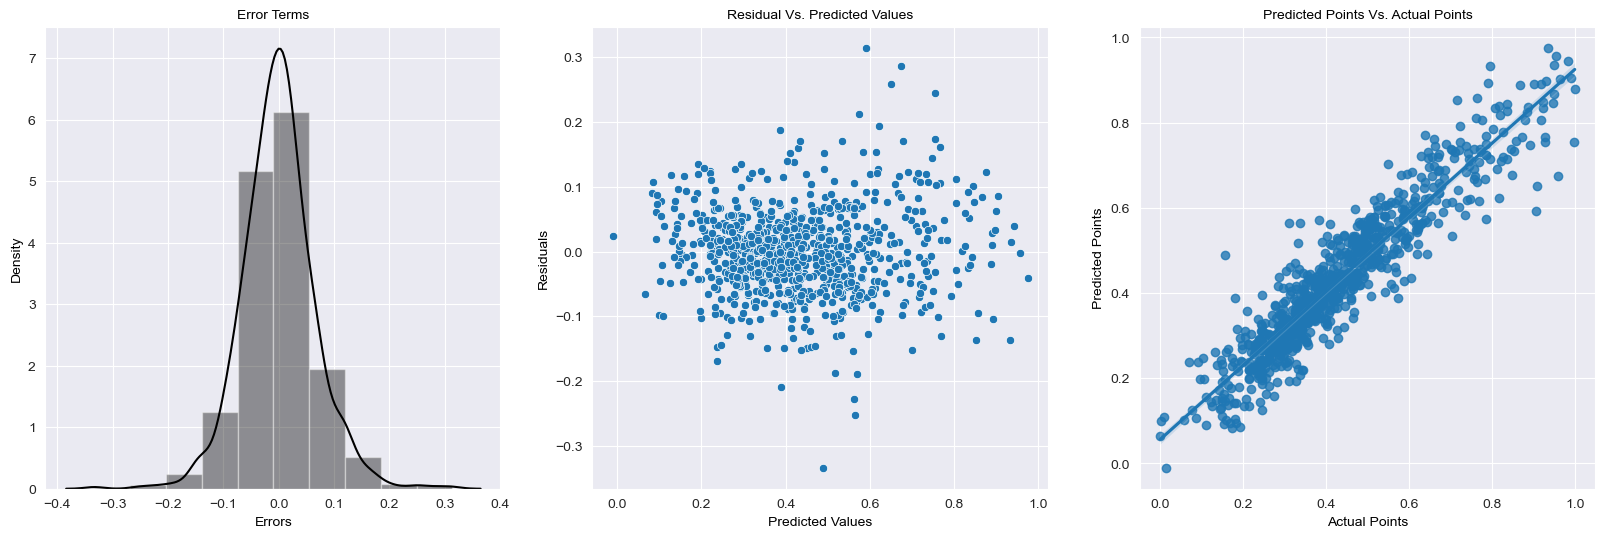

In [64]:
#Residual Analysis
y_pred_train = ref_ridge.predict(X_train_lm)
res= y_train - y_pred_train
res_anal(y_pred_train,res)
# We can observe that error terms are normally distributed, independent of each other and follow Homoscedasticity

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_test = ref_ridge.predict(X_test_lm)
ref_ridge_metric=calc_metrics(y_pred_train,y_pred_test,y_train,y_test)

R2 Train 0.8750504819915119
R2 Test 0.7820555890933902
Residual sum of square Train 3.703299689880448
Residual sum of square Test 2.8317417247626824
Mean Sqr Error Train 0.00429119315165753
Mean Sqr Error Test 0.007653356012872115


### 10. Ridge Regression
With out REF, using the entire training set

In [66]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the better Hyperparameter alpha
print(model_ridge.best_params_)

{'alpha': 2.0}


In [68]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

#### Residual Analysis

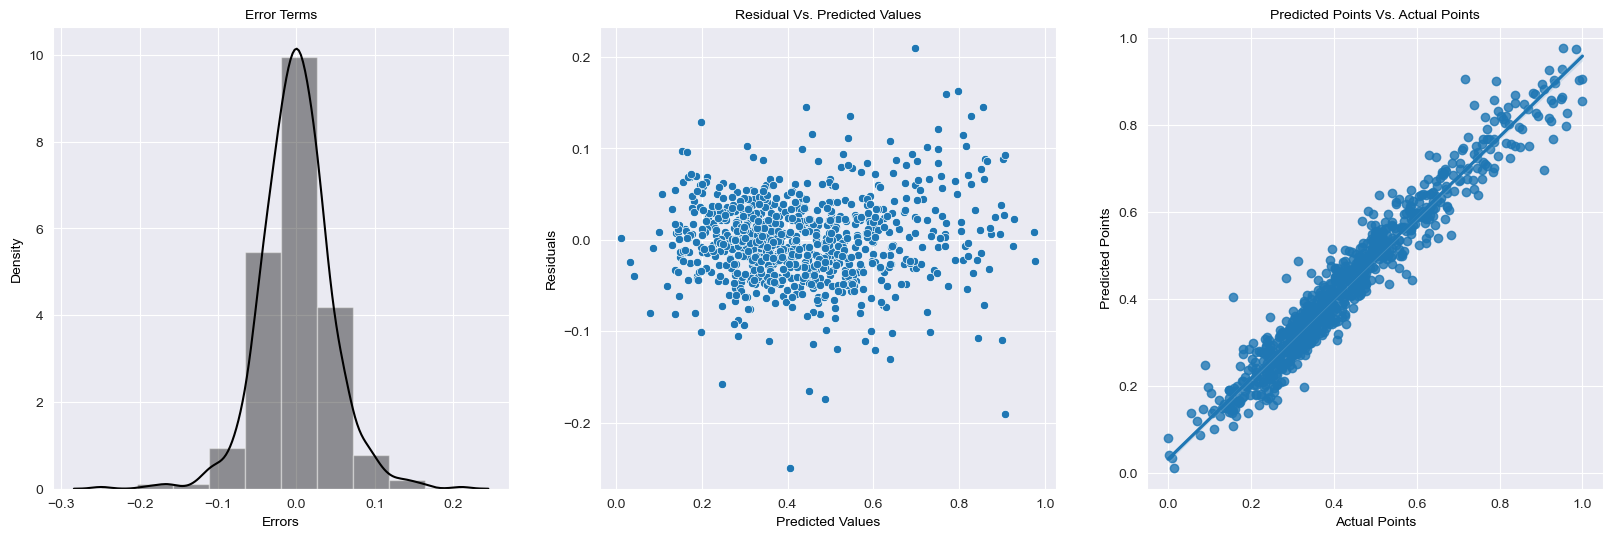

In [69]:
#Residual Analysis
y_pred_train = ridge.predict(X_train)
res= y_train - y_pred_train
res_anal(y_pred_train,res)
# We can observe that error terms are normally distributed, independent of each other and follow Homoscedasticity

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_test = ridge.predict(X_test)
ridge_metric=calc_metrics(y_pred_train,y_pred_test,y_train,y_test)

R2 Train 0.9412174568070016
R2 Test 0.8826370331235108
Residual sum of square Train 1.7422185971315765
Residual sum of square Test 1.5248916403206358
Mean Sqr Error Train 0.0020187932759346194
Mean Sqr Error Test 0.00412132875762334


### 11.Lasso Regression

In [71]:
lasso = Lasso()

# cross validation
model_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# Printing the best hyperparameter alpha
print(model_lasso.best_params_)

{'alpha': 0.0001}


In [73]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

#### Residual Analysis

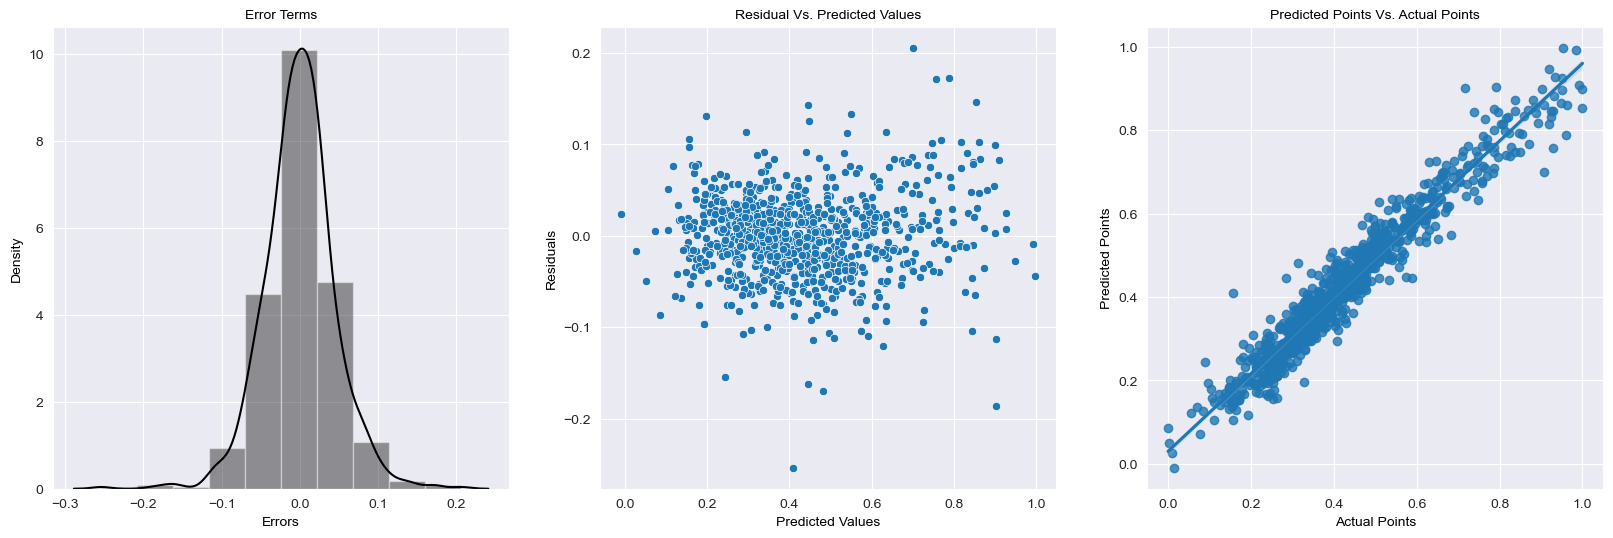

In [74]:
#Residual Analysis
y_pred_train = lasso.predict(X_train)
res= y_train - y_pred_train
res_anal(y_pred_train,res)
# We can observe that error terms are normally distributed, independent of each other and follow Homoscedasticity

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_test = lasso.predict(X_test)
lasso_metric=calc_metrics(y_pred_train,y_pred_test,y_train,y_test)

R2 Train 0.940836919397626
R2 Test 0.887634851862918
Residual sum of square Train 1.7534971045847456
Residual sum of square Test 1.4599552108966924
Mean Sqr Error Train 0.0020318622301097864
Mean Sqr Error Test 0.003945824894315385


### 12. Comparison of models 

#### 12.1 compare metrics

In [76]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

h_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
ref_lr_metric = pd.Series(lr_metric ,name = 'REF+Linear Regression with feature elimination')
ref_rg_metric = pd.Series(ref_ridge_metric, name = 'REF+Ridge Regression')
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([h_metric,ref_lr_metric, ref_rg_metric,rg_metric, ls_metric], axis = 1)

final_metric

Metric  REF+Linear Regression with feature elimination  \
0  R2 Score (Train)                                        0.875405   
1   R2 Score (Test)                                        0.776238   
2       RSS (Train)                                        3.692802   
3        RSS (Test)                                        2.907332   
4       MSE (Train)                                        0.065414   
5        MSE (Test)                                        0.088643   

   REF+Ridge Regression  Ridge Regression  Lasso Regression  
0              0.875050          0.941217          0.940837  
1              0.782056          0.882637          0.887635  
2              3.703300          1.742219          1.753497  
3              2.831742          1.524892          1.459955  
4              0.065507          0.044931          0.045076  
5              0.087483          0.064198          0.062816

#### Observations: 
As we can see , Ridge regression without RFE and Lasso models seem to perform better.

#### 12.2. compare the top 10 features 

In [77]:
#Top 10 important predictor variables: REF+Linear regression through manual feature elimination
rfe_lr_coef_df = pd.DataFrame({
    'Feature': X_train_lm.columns,
    'Coefficient': lr.params,
    'AbsCoefficient': abs(lr.params)
})

print(rfe_lr_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                             Feature  Coefficient  AbsCoefficient
GrLivArea                  GrLivArea     0.444680        0.444680
OverallQual_10        OverallQual_10     0.368644        0.368644
OverallQual_9          OverallQual_9     0.348985        0.348985
HouseAge                    HouseAge    -0.295411        0.295411
TotalBsmtSF              TotalBsmtSF     0.242375        0.242375
OverallQual_8          OverallQual_8     0.169187        0.169187
const                          const     0.167391        0.167391
Exterior2nd_Other  Exterior2nd_Other     0.141517        0.141517
OverallCond_9          OverallCond_9     0.140848        0.140848
RoofStyle_Mansard  RoofStyle_Mansard     0.128887        0.128887


In [78]:
#Top 10 important predictor variables: REF+Ridge
ref_ridge_coef_df = pd.DataFrame({
    'Feature': X_train_lm.columns,
    'Coefficient': ref_ridge.coef_,
    'AbsCoefficient': abs(ref_ridge.coef_)
})

print(ref_ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

              Feature  Coefficient  AbsCoefficient
3           GrLivArea     0.437949        0.437949
8       OverallQual_9     0.332140        0.332140
9      OverallQual_10     0.321320        0.321320
4            HouseAge    -0.292199        0.292199
1         TotalBsmtSF     0.232746        0.232746
7       OverallQual_8     0.169776        0.169776
14      OverallCond_9     0.134851        0.134851
20     BsmtFullBath_2     0.116155        0.116155
15  RoofStyle_Mansard     0.112019        0.112019
16  Exterior2nd_Other     0.108606        0.108606


In [79]:
#Top 10 important predictor variables: Ridge
ridge_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge.coef_,
    'AbsCoefficient': abs(ridge.coef_)
})

print(ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                 Feature  Coefficient  AbsCoefficient
10             GrLivArea     0.167062        0.167062
7               1stFlrSF     0.125555        0.125555
88         OverallQual_9     0.119426        0.119426
18              HouseAge    -0.112034        0.112034
6            TotalBsmtSF     0.088676        0.088676
82         OverallQual_3    -0.082396        0.082396
8               2ndFlrSF     0.081904        0.081904
3             BsmtFinSF1     0.081555        0.081555
1                LotArea     0.073762        0.073762
51  Neighborhood_Crawfor     0.063653        0.063653


In [80]:
#Top 10 important predictor variables: Lasso
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_,
    'AbsCoefficient': abs(lasso.coef_)
})

print(lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                  Feature  Coefficient  AbsCoefficient
10              GrLivArea     0.371216        0.371216
18               HouseAge    -0.191091        0.191091
88          OverallQual_9     0.190527        0.190527
6             TotalBsmtSF     0.162481        0.162481
89         OverallQual_10     0.110382        0.110382
87          OverallQual_8     0.098898        0.098898
97          OverallCond_9     0.084931        0.084931
1                 LotArea     0.072976        0.072976
51   Neighborhood_Crawfor     0.071476        0.071476
186          GarageCars_4     0.064714        0.064714


#### Observations: 
1. We can notice that Ground Floor Living area is the dominant factor in all the models. 
2. We also see that House Age is a negative indicator for price. As the age of the house goes up, price goes down
3. High Over all quality(8,9,10) is one of the prominent predictors in all the models.
4. Followed by Total basement Area , Good over all condition and lot Area , which also are seen in all the models with decent beta values. They carry considerable weight in predicting the overall price of the house.


# Assignment Questions

**Question 1**

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [81]:
# Printing the better Hyperparameter alpha
print('ridge model optimal alpha',model_ridge.best_params_)

# Printing the better Hyperparameter alpha
print('lasso model optimal alpha',model_lasso.best_params_)

ridge model optimal alpha {'alpha': 2.0}
lasso model optimal alpha {'alpha': 0.0001}


In [82]:
#Fitting Ridge model for alpha = 2*2 and printing coefficients which have been penalised
alpha = 4.0
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train, y_train)

Ridge(alpha=4.0)

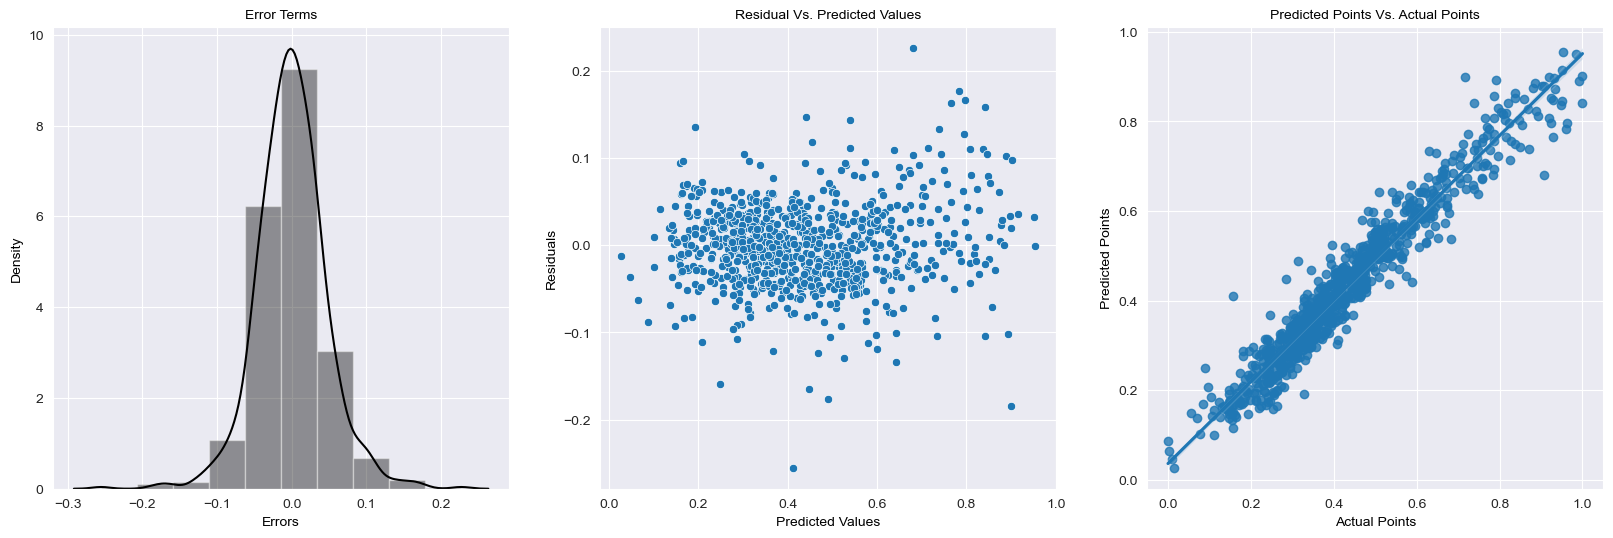

In [83]:
#Residual Analysis
y_pred_train = ridge_double.predict(X_train)
res= y_train - y_pred_train
res_anal(y_pred_train,res)
# We can observe that error terms are normally distributed, independent of each other and follow Homoscedasticity

In [84]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_test = ridge_double.predict(X_test)
ridge_double_metric=calc_metrics(y_pred_train,y_pred_test,y_train,y_test)

R2 Train 0.9360116976898599
R2 Test 0.8902896828751281
Residual sum of square Train 1.8965087971369388
Residual sum of square Test 1.4254611134422241
Mean Sqr Error Train 0.0021975768217114004
Mean Sqr Error Test 0.003852597603897903


In [85]:
#Fitting Lasso model for alpha = 0.0001*2 and printing coefficients which have been penalised

alpha =0.0002

lasso_double = Lasso(alpha=alpha)
        
lasso_double.fit(X_train, y_train) 

Lasso(alpha=0.0002)

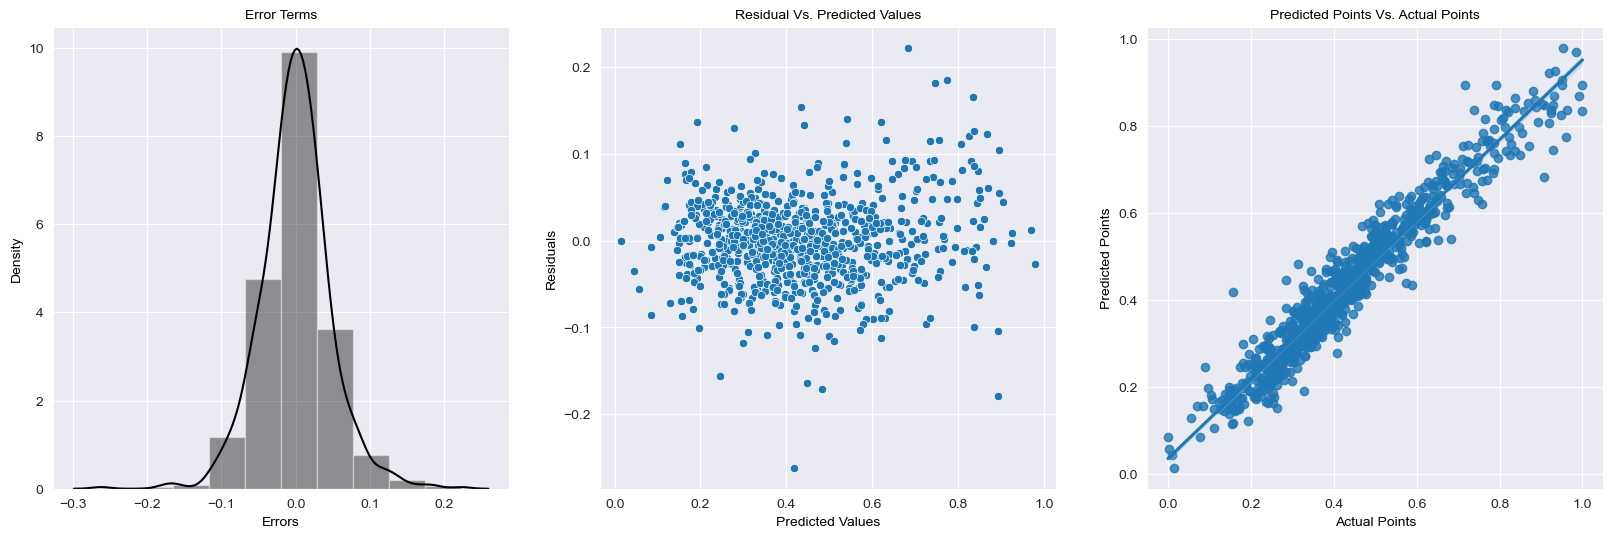

In [86]:
#Residual Analysis
y_pred_train = lasso_double.predict(X_train)
res= y_train - y_pred_train
res_anal(y_pred_train,res)
# We can observe that error terms are normally distributed, independent of each other and follow Homoscedasticity

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_test = lasso_double.predict(X_test)
lasso_double_metric=calc_metrics(y_pred_train,y_pred_test,y_train,y_test)

R2 Train 0.9345817231545283
R2 Test 0.891270778012526
Residual sum of square Train 1.9388909074294411
Residual sum of square Test 1.4127137893655277
Mean Sqr Error Train 0.0022466870306250765
Mean Sqr Error Test 0.0038181453766635886


In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

h_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')
rg_d_metric = pd.Series(ridge_double_metric, name = 'Ridge Regression with double alpha')
ls_d_metric = pd.Series(lasso_double_metric, name = 'Lasso Regression with double alpha')

final_metric = pd.concat([h_metric,rg_metric,rg_d_metric,ls_metric,ls_d_metric], axis = 1)

final_metric

Metric  Ridge Regression  Ridge Regression with double alpha  \
0  R2 Score (Train)          0.941217                            0.936012   
1   R2 Score (Test)          0.882637                            0.890290   
2       RSS (Train)          1.742219                            1.896509   
3        RSS (Test)          1.524892                            1.425461   
4       MSE (Train)          0.044931                            0.046878   
5        MSE (Test)          0.064198                            0.062069   

   Lasso Regression  Lasso Regression with double alpha  
0          0.940837                            0.934582  
1          0.887635                            0.891271  
2          1.753497                            1.938891  
3          1.459955                            1.412714  
4          0.045076                            0.047399  
5          0.062816                            0.061791

In [89]:
#Top 5 important predictor variables: Lasso
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_,
    'AbsCoefficient': abs(lasso.coef_)
})

print(lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

           Feature  Coefficient  AbsCoefficient
10       GrLivArea     0.371216        0.371216
18        HouseAge    -0.191091        0.191091
88   OverallQual_9     0.190527        0.190527
6      TotalBsmtSF     0.162481        0.162481
89  OverallQual_10     0.110382        0.110382


In [90]:
#Top 5 important predictor variables: Lasso_double
lasso_d_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_double.coef_,
    'AbsCoefficient': abs(lasso_double.coef_)
})

print(lasso_d_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

          Feature  Coefficient  AbsCoefficient
10      GrLivArea     0.364408        0.364408
18       HouseAge    -0.181625        0.181625
88  OverallQual_9     0.175499        0.175499
6     TotalBsmtSF     0.165912        0.165912
87  OverallQual_8     0.102027        0.102027


In [91]:
#Top 5 important predictor variables: Ridge
ridge_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge.coef_,
    'AbsCoefficient': abs(ridge.coef_)
})

print(ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

          Feature  Coefficient  AbsCoefficient
10      GrLivArea     0.167062        0.167062
7        1stFlrSF     0.125555        0.125555
88  OverallQual_9     0.119426        0.119426
18       HouseAge    -0.112034        0.112034
6     TotalBsmtSF     0.088676        0.088676


In [92]:
#Top 5 important predictor variables: Ridge_double
ridge_d_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_double.coef_,
    'AbsCoefficient': abs(ridge_double.coef_)
})

print(ridge_d_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

          Feature  Coefficient  AbsCoefficient
10      GrLivArea     0.142778        0.142778
7        1stFlrSF     0.110502        0.110502
88  OverallQual_9     0.096500        0.096500
18       HouseAge    -0.083145        0.083145
6     TotalBsmtSF     0.079360        0.079360


**Question 2**

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [93]:
# Printing the better Hyperparameter alpha
print('ridge model optimal alpha',model_ridge.best_params_)

# Printing the better Hyperparameter alpha
print('lasso model optimal alpha',model_lasso.best_params_)

ridge model optimal alpha {'alpha': 2.0}
lasso model optimal alpha {'alpha': 0.0001}


In [94]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

h_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([h_metric,rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.941217          0.940837
1   R2 Score (Test)          0.882637          0.887635
2       RSS (Train)          1.742219          1.753497
3        RSS (Test)          1.524892          1.459955
4       MSE (Train)          0.044931          0.045076
5        MSE (Test)          0.064198          0.062816

In [95]:
#Top 10 important predictor variables: Ridge
ridge_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge.coef_,
    'AbsCoefficient': abs(ridge.coef_)
})

print(ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                 Feature  Coefficient  AbsCoefficient
10             GrLivArea     0.167062        0.167062
7               1stFlrSF     0.125555        0.125555
88         OverallQual_9     0.119426        0.119426
18              HouseAge    -0.112034        0.112034
6            TotalBsmtSF     0.088676        0.088676
82         OverallQual_3    -0.082396        0.082396
8               2ndFlrSF     0.081904        0.081904
3             BsmtFinSF1     0.081555        0.081555
1                LotArea     0.073762        0.073762
51  Neighborhood_Crawfor     0.063653        0.063653


In [96]:
#Top 10 important predictor variables: Lasso
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_,
    'AbsCoefficient': abs(lasso.coef_)
})

print(lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                  Feature  Coefficient  AbsCoefficient
10              GrLivArea     0.371216        0.371216
18               HouseAge    -0.191091        0.191091
88          OverallQual_9     0.190527        0.190527
6             TotalBsmtSF     0.162481        0.162481
89         OverallQual_10     0.110382        0.110382
87          OverallQual_8     0.098898        0.098898
97          OverallCond_9     0.084931        0.084931
1                 LotArea     0.072976        0.072976
51   Neighborhood_Crawfor     0.071476        0.071476
186          GarageCars_4     0.064714        0.064714


We will go with Ridge, because the model performance is almost similar for both, but when we see the beta values, we notice that the beta values on Ridge are on a lower end. 

**Question 3**

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [97]:
#Top 5 important predictor variables: Lasso
lasso_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_,
    'AbsCoefficient': abs(lasso.coef_)
})

print(lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

           Feature  Coefficient  AbsCoefficient
10       GrLivArea     0.371216        0.371216
18        HouseAge    -0.191091        0.191091
88   OverallQual_9     0.190527        0.190527
6      TotalBsmtSF     0.162481        0.162481
89  OverallQual_10     0.110382        0.110382


In [98]:
X_train_del5=X_train.drop(['GrLivArea','HouseAge','OverallQual_9','TotalBsmtSF','OverallQual_10'],axis=1)

In [99]:
lasso_del5 = Lasso()

# cross validation
model_lasso_del5 = GridSearchCV(estimator = lasso_del5, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_del5.fit(X_train_del5, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_lasso_del5.best_params_)

{'alpha': 0.0001}


In [101]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso_del5 = Lasso(alpha=alpha)
        
lasso_del5.fit(X_train_del5, y_train) 

Lasso(alpha=0.0001)

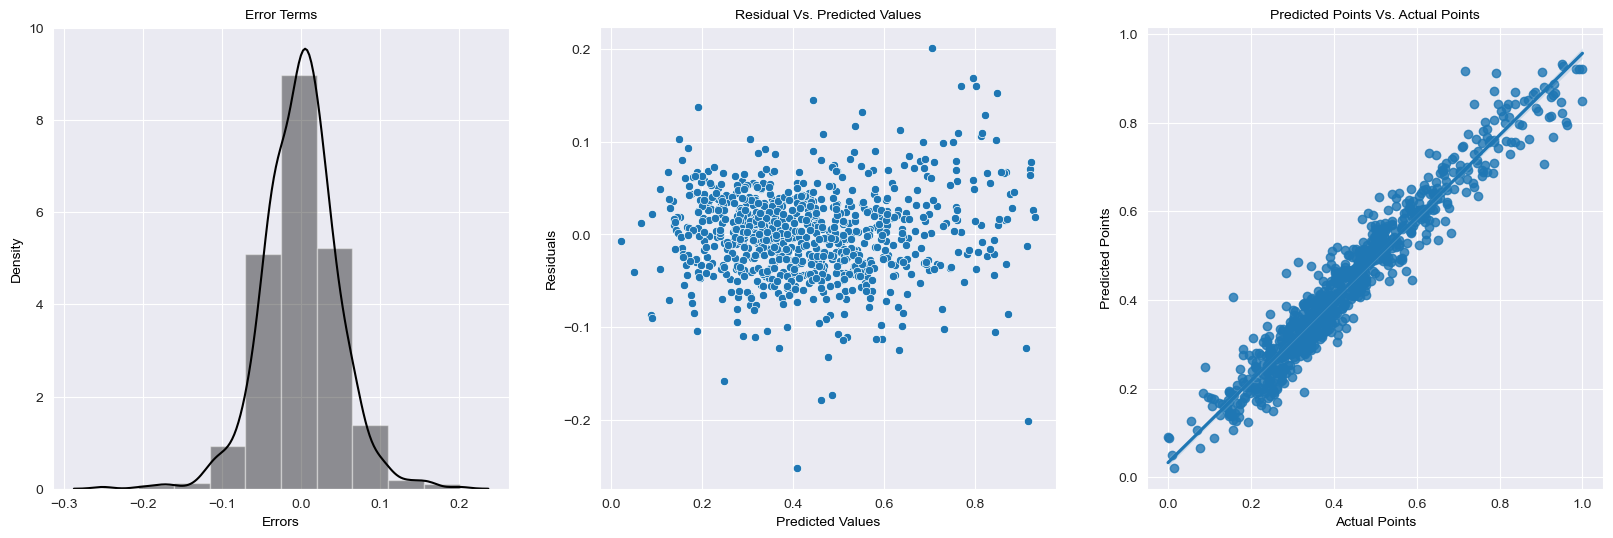

In [102]:
#Residual Analysis
y_pred_train = lasso_del5.predict(X_train_del5)
res= y_train - y_pred_train
res_anal(y_pred_train,res)
# We can observe that error terms are normally distributed, independent of each other and follow Homoscedasticity

In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
X_test_del5=X_test.drop(['GrLivArea','HouseAge','OverallQual_9','TotalBsmtSF','OverallQual_10'],axis=1)
y_pred_test = lasso_del5.predict(X_test_del5)
lasso_del5_metric=calc_metrics(y_pred_train,y_pred_test,y_train,y_test)

R2 Train 0.9354147747218308
R2 Test 0.8606391174204885
Residual sum of square Train 1.9142006192233176
Residual sum of square Test 1.8107095490934983
Mean Sqr Error Train 0.0022180771949285257
Mean Sqr Error Test 0.00489380959214459


In [104]:
#Top 5 important predictor variables: lasso_del5
lasso_del5_coef_df = pd.DataFrame({
    'Feature': X_test_del5.columns,
    'Coefficient': lasso_del5.coef_,
    'AbsCoefficient': abs(lasso_del5.coef_)
})

print(lasso_del5_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

          Feature  Coefficient  AbsCoefficient
6        1stFlrSF     0.339290        0.339290
7        2ndFlrSF     0.212103        0.212103
79  OverallQual_3    -0.158811        0.158811
3      BsmtFinSF1     0.137248        0.137248
4      BsmtFinSF2     0.111035        0.111035


In [105]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

h_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')
ls_del5_metric = pd.Series(lasso_del5_metric, name = 'Lasso After DEL top 5')

final_metric = pd.concat([h_metric,ls_metric,ls_del5_metric], axis = 1)

final_metric

Metric  Lasso Regression  Lasso After DEL top 5
0  R2 Score (Train)          0.940837               0.935415
1   R2 Score (Test)          0.887635               0.860639
2       RSS (Train)          1.753497               1.914201
3        RSS (Test)          1.459955               1.810710
4       MSE (Train)          0.045076               0.047096
5        MSE (Test)          0.062816               0.069956